# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Наша задача: проанализировать объявления о продаже квартир и выявить параметры, которые влияют на рыночную стоимость объектов недвижимости. Это позволит в дальнейшем построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Нужно:
- изучить предложенный датасет
- сделать предобработку данных (обработать пропуски, удалить дубликаты, изменить типы данных по необходимости, выявить аномалии и редкие значения)
- добавить новые столбцы значений, которые пригодятся для дальнейших расчетов
- провести исследовательский анализ данных
- сделать выводы по полученным результатам

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-файл-с-данными-и-изучите-общую-информацию." data-toc-modified-id="Откройте-файл-с-данными-и-изучите-общую-информацию.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте файл с данными и изучите общую информацию.</a></span><ul class="toc-item"><li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Общая информация</a></span></li><li><span><a href="#Гистограмма-для-всех-столбцов-датасета" data-toc-modified-id="Гистограмма-для-всех-столбцов-датасета-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Гистограмма для всех столбцов датасета</a></span></li><li><span><a href="#Вывод-по-общему-анализу-файла" data-toc-modified-id="Вывод-по-общему-анализу-файла-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод по общему анализу файла</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Пропущенные-данные" data-toc-modified-id="Пропущенные-данные-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Пропущенные данные</a></span><ul class="toc-item"><li><span><a href="#Балконы" data-toc-modified-id="Балконы-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Балконы</a></span></li><li><span><a href="#Апартаменты" data-toc-modified-id="Апартаменты-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Апартаменты</a></span></li><li><span><a href="#Парки,-водоемы" data-toc-modified-id="Парки,-водоемы-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Парки, водоемы</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Жилая-площадь-и-площадь-кухни" data-toc-modified-id="Жилая-площадь-и-площадь-кухни-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Жилая площадь и площадь кухни</a></span></li><li><span><a href="#Расстояние-до-парков-и-водоемов" data-toc-modified-id="Расстояние-до-парков-и-водоемов-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Расстояние до парков и водоемов</a></span></li><li><span><a href="#Расстояние-до-аэропорта-и-центра-города" data-toc-modified-id="Расстояние-до-аэропорта-и-центра-города-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>Расстояние до аэропорта и центра города</a></span></li><li><span><a href="#Населенный-пункт" data-toc-modified-id="Населенный-пункт-2.1.8"><span class="toc-item-num">2.1.8&nbsp;&nbsp;</span>Населенный пункт</a></span></li><li><span><a href="#Количество-этажей-в-доме" data-toc-modified-id="Количество-этажей-в-доме-2.1.9"><span class="toc-item-num">2.1.9&nbsp;&nbsp;</span>Количество этажей в доме</a></span></li><li><span><a href="#Дни-продажи-квартиры" data-toc-modified-id="Дни-продажи-квартиры-2.1.10"><span class="toc-item-num">2.1.10&nbsp;&nbsp;</span>Дни продажи квартиры</a></span></li></ul></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Удаление-неявных-дубликатов" data-toc-modified-id="Удаление-неявных-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Удаление неявных дубликатов</a></span></li><li><span><a href="#Аномалии-и-редкие-значения" data-toc-modified-id="Аномалии-и-редкие-значения-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Аномалии и редкие значения</a></span></li><li><span><a href="#Вывод-по-предобработке-данных" data-toc-modified-id="Вывод-по-предобработке-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод по предобработке данных</a></span></li></ul></li><li><span><a href="#Посчитайте-и-добавьте-в-таблицу-новые-столбцы" data-toc-modified-id="Посчитайте-и-добавьте-в-таблицу-новые-столбцы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Посчитайте и добавьте в таблицу новые столбцы</a></span><ul class="toc-item"><li><span><a href="#Цена-за-1-кв.м." data-toc-modified-id="Цена-за-1-кв.м.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Цена за 1 кв.м.</a></span></li><li><span><a href="#День-недели-публикации-объявления" data-toc-modified-id="День-недели-публикации-объявления-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>День недели публикации объявления</a></span></li><li><span><a href="#Месяц-публикации-объявления" data-toc-modified-id="Месяц-публикации-объявления-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Месяц публикации объявления</a></span></li><li><span><a href="#Год-публикации-объявления" data-toc-modified-id="Год-публикации-объявления-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Год публикации объявления</a></span></li><li><span><a href="#Тип-квартиры" data-toc-modified-id="Тип-квартиры-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Тип квартиры</a></span></li><li><span><a href="#Расстояние-до-центра-в-км" data-toc-modified-id="Расстояние-до-центра-в-км-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Расстояние до центра в км</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проведите-исследовательский-анализ-данных" data-toc-modified-id="Проведите-исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проведите исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Общая-площадь-квартиры" data-toc-modified-id="Общая-площадь-квартиры-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Общая площадь квартиры</a></span></li><li><span><a href="#Жилая-площадь" data-toc-modified-id="Жилая-площадь-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Жилая площадь</a></span></li><li><span><a href="#Площадь-кухни" data-toc-modified-id="Площадь-кухни-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Площадь кухни</a></span></li><li><span><a href="#Цена-квартиры" data-toc-modified-id="Цена-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Цена квартиры</a></span></li><li><span><a href="#Количество-комнат" data-toc-modified-id="Количество-комнат-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Количество комнат</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Этаж-квартиры" data-toc-modified-id="Этаж-квартиры-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Этаж квартиры</a></span></li><li><span><a href="#Тип-этажа-квартиры" data-toc-modified-id="Тип-этажа-квартиры-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Тип этажа квартиры</a></span></li><li><span><a href="#Количество-этажей-в-доме" data-toc-modified-id="Количество-этажей-в-доме-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Количество этажей в доме</a></span></li><li><span><a href="#Расстояние-до-центра-города-в-метрах" data-toc-modified-id="Расстояние-до-центра-города-в-метрах-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Расстояние до центра города в метрах</a></span></li><li><span><a href="#Расстояние-до-аэропорта" data-toc-modified-id="Расстояние-до-аэропорта-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>Расстояние до аэропорта</a></span></li><li><span><a href="#Расстояние-до-ближайшего-парка" data-toc-modified-id="Расстояние-до-ближайшего-парка-4.12"><span class="toc-item-num">4.12&nbsp;&nbsp;</span>Расстояние до ближайшего парка</a></span></li><li><span><a href="#Дата-публикации-объявления" data-toc-modified-id="Дата-публикации-объявления-4.13"><span class="toc-item-num">4.13&nbsp;&nbsp;</span>Дата публикации объявления</a></span></li><li><span><a href="#Скорость-продажи-квартиры" data-toc-modified-id="Скорость-продажи-квартиры-4.14"><span class="toc-item-num">4.14&nbsp;&nbsp;</span>Скорость продажи квартиры</a></span></li><li><span><a href="#Факторы,-влияющие-на-общую-стоимость-квартиры" data-toc-modified-id="Факторы,-влияющие-на-общую-стоимость-квартиры-4.15"><span class="toc-item-num">4.15&nbsp;&nbsp;</span>Факторы, влияющие на общую стоимость квартиры</a></span></li><li><span><a href="#Средние-цены-за-1-кв.м." data-toc-modified-id="Средние-цены-за-1-кв.м.-4.16"><span class="toc-item-num">4.16&nbsp;&nbsp;</span>Средние цены за 1 кв.м.</a></span></li><li><span><a href="#Зависимость-расстояния-на-цену-кв.м." data-toc-modified-id="Зависимость-расстояния-на-цену-кв.м.-4.17"><span class="toc-item-num">4.17&nbsp;&nbsp;</span>Зависимость расстояния на цену кв.м.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.18"><span class="toc-item-num">4.18&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

data = pd.read_csv('real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00


#### Общая информация
Посмотрим на данные в датасете: какое количество строк и столбцов, какие названия они имеют, есть ли пропуски в данных, какие типы данных в ячейках. 

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В датасете 23699 строк, 22 столбца. Названия колонок оформлены в стиле "snake_case", кроме "cityCenters_nearest", "parks_around3000" и "ponds_around3000". Есть колонки с пропусками. 

Есть проблемы в типах данных столбцов:
1. Столбец "is_apartment" в описании имеет булевый тип, а по факту object. 
2. Столбцы "balcony", "floors_total", "parks_around3000", "ponds_around3000"  имеют тип float64, хотя в жизни количество банконов, этажей, парков и водоемов может быть только целым числом.
3. Столбец "first_day_exposition" имеет тип object, хотя обозначает дату публикации объявления.
4. Столбцы "total_images", "rooms" и "floor" имеют тип int64, хотя можно использовать тип int8, так как значения в этих колонках поместятся в диапазон значений int8. Изменение типа уменьшит итоговый размер самого файла.

#### Гистограмма для всех столбцов датасета

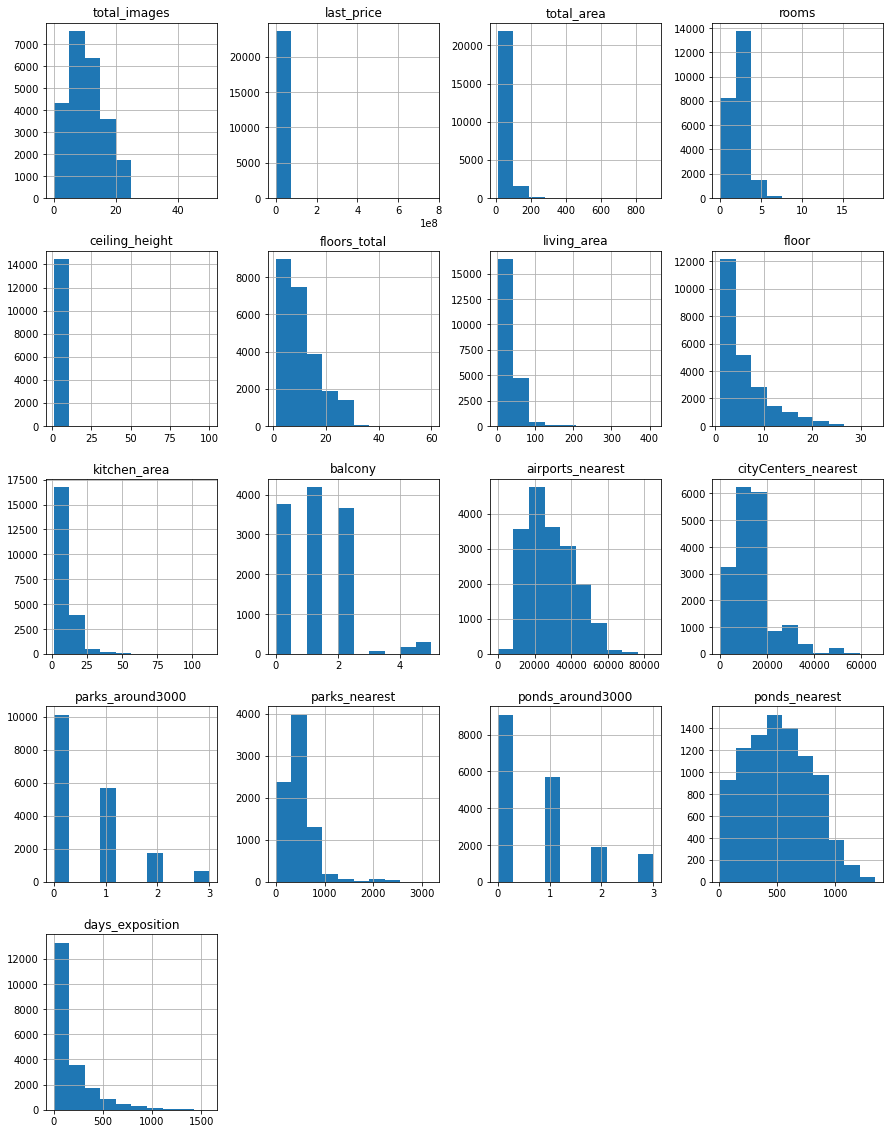

In [3]:
data.hist(figsize=(15, 20));

Графики наглядно доказывают гипотезу из 4 пункта об неэффективности использовать тип данных int64 для целочисленных данных. Также мы не видим аномальных выбросов в данных.

Перед началом предобработки данных изменим названия столбца "cityCenters_nearest" на единый стиль: только строчные буквы и с нижним подчеркиванием.

In [4]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

#### Вывод по общему анализу файла
Файл с данными изучен, найдены несоответствия в типах данных, найдены пропуски, изменено название одного столбца, построены гистограммы. Можно приступать к предобработке данных.

### Предобработка данных
#### Пропущенные данные
Для начала посмотрим, сколько есть пропущенных данных и в каких столбцах.

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

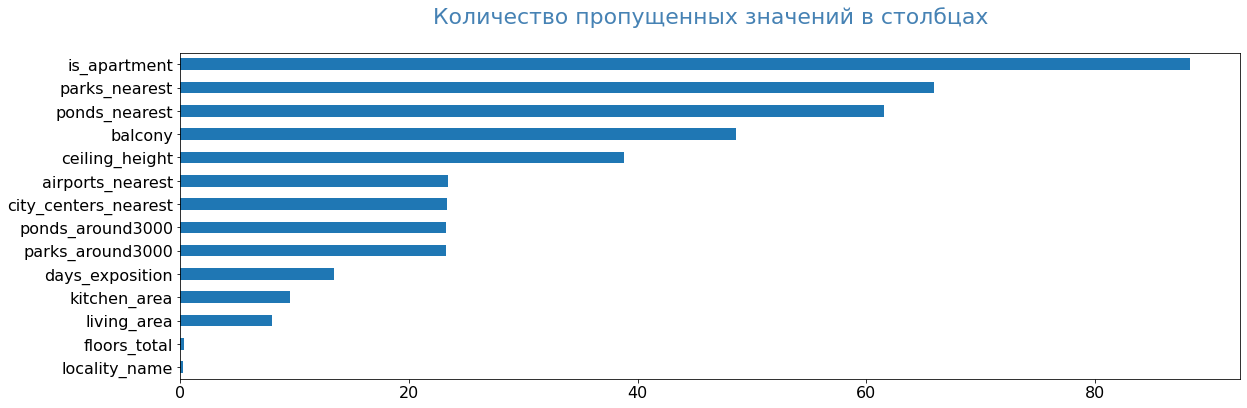

In [6]:
# пропущенные значения на графике
def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), legend = False, fontsize = 16)
        .set_title('Количество пропущенных значений в столбцах' + "\n", fontsize = 22, color = 'SteelBlue')    
    ); 

pass_value_barh(data)

В датасете очень много пропущенных данных. Будем разбираться.

##### Балконы
Начнем с колонки 'balcony'. Если продавец не указал количество балконов в квартире, то скорее всего балконов нет. Заполним все пропуски в этой колонке значением 0 и сразу изменим тип данных на int.

In [7]:
# Выведем все уникальные значения количества балконов
display(data['balcony'].unique())

# Заполним пропуски на 0 и изменим тип на int8
data['balcony'] = data['balcony'].fillna(0).astype('int8')
display(data['balcony'].head(10))

# Проверим на заполнение пропусков - 0 пропущенных значений
data['balcony'].isna().sum()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

0    0
1    2
2    0
3    0
4    0
5    0
6    1
7    2
8    0
9    2
Name: balcony, dtype: int8

0

##### Апартаменты
Следующий столбец - 'is_apartment'. Аналогично как с колонкой балконов: если не указано значение, значит скорее всего это не апартаменты, можно заполнить все пропуски значением False (0). Также сразу изменим тип данных на bool.

In [8]:
# Выведем все уникальные значения столбца
display(data['is_apartment'].unique())

# Заполним пропуски на False и изменим тип на bool
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')
display(data['is_apartment'].head(10))

# Проверим на заполнение пропусков - 0 пропущенных значений
data['is_apartment'].isna().sum()

array([nan, False, True], dtype=object)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: is_apartment, dtype: bool

0

##### Парки, водоемы
Следующие колонки: "parks_around3000" и "ponds_around3000". Если бы парки или водоемы были недалеко от квартиры, собственник обязательно бы это указал, так как эти параметры "улучшают" саму квартиру и увеличивают шансы на ее продажу. Заполним пустые данные значением 0 и изменим тип данных на int8.

In [9]:
# Выведем все уникальные значения столбца parks_around3000
display(data['parks_around3000'].unique())

# Заполним пропуски на 0 и изменим тип на int8
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int8')
display(data['parks_around3000'].head(10))

# Проверим на заполнение пропусков - 0 пропущенных значений
data['parks_around3000'].isna().sum()

array([ 1.,  0.,  2., nan,  3.])

0    1
1    0
2    1
3    2
4    2
5    0
6    0
7    0
8    0
9    0
Name: parks_around3000, dtype: int8

0

In [10]:
# Выведем все уникальные значения столбца ponds_around3000
display(data['ponds_around3000'].unique())

# Заполним пропуски на 0 и изменим тип на int8
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int8')
display(data['ponds_around3000'].head(10))

# Проверим на заполнение пропусков - 0 пропущенных значений
data['ponds_around3000'].isna().sum()

array([ 2.,  0.,  3.,  1., nan])

0    2
1    0
2    2
3    3
4    1
5    0
6    0
7    0
8    0
9    0
Name: ponds_around3000, dtype: int8

0

##### Высота потолков
Очередь столбца "ceiling_height" - высота потолков. По стандартам минимальная высота потолка в квартире может быть 2,4 метра. Максимального порога нет, но в реальности потолки выше 6 метров встречаются редко.

In [11]:
# Выведем все уникальные значения столбца ceiling_height и отсортируем их по убыванию
data['ceiling_height'].sort_values(ascending=False).unique()

array([100.  ,  32.  ,  27.5 ,  27.  ,  26.  ,  25.  ,  24.  ,  22.6 ,
        20.  ,  14.  ,  10.3 ,   8.3 ,   8.  ,   6.  ,   5.8 ,   5.6 ,
         5.5 ,   5.3 ,   5.2 ,   5.  ,   4.9 ,   4.8 ,   4.7 ,   4.65,
         4.5 ,   4.45,   4.4 ,   4.37,   4.3 ,   4.25,   4.2 ,   4.19,
         4.15,   4.14,   4.1 ,   4.06,   4.  ,   3.98,   3.95,   3.93,
         3.9 ,   3.88,   3.87,   3.86,   3.85,   3.84,   3.83,   3.82,
         3.8 ,   3.78,   3.76,   3.75,   3.7 ,   3.69,   3.68,   3.67,
         3.66,   3.65,   3.63,   3.62,   3.6 ,   3.59,   3.58,   3.57,
         3.56,   3.55,   3.54,   3.53,   3.52,   3.51,   3.5 ,   3.49,
         3.48,   3.47,   3.46,   3.45,   3.44,   3.43,   3.42,   3.4 ,
         3.39,   3.38,   3.37,   3.36,   3.35,   3.34,   3.33,   3.32,
         3.31,   3.3 ,   3.29,   3.28,   3.27,   3.26,   3.25,   3.24,
         3.23,   3.22,   3.21,   3.2 ,   3.18,   3.17,   3.16,   3.15,
         3.14,   3.13,   3.12,   3.11,   3.1 ,   3.09,   3.08,   3.07,
      

In [12]:
# Минимальное значение
print(data['ceiling_height'].min())
# Максимальное значение
data['ceiling_height'].max()

1.0


100.0

In [13]:
''' Посчитаем количество квартир с высотой потолков ниже 2,4 метра (всего 21 квартира) и удалим эти значения 
из ячеек, чтобы эти данные не искажали дальнейшие расчеты. Скорее всего владельцы квартир ошиблись при заполнении 
или не знали истинные значения.'''
print(data.query('ceiling_height < 2.4').count())
data['ceiling_height'] = data['ceiling_height'].where((data['ceiling_height'] >= 2.4), pd.NA)

# Проверим, что значения меньше 2,4 пропали.
data['ceiling_height'].sort_values(ascending=False).unique()

total_images            21
last_price              21
total_area              21
first_day_exposition    21
rooms                   21
ceiling_height          21
floors_total            21
living_area             18
floor                   21
is_apartment            21
studio                  21
open_plan               21
kitchen_area            18
balcony                 21
locality_name           21
airports_nearest         6
city_centers_nearest     6
parks_around3000        21
parks_nearest            4
ponds_around3000        21
ponds_nearest            5
days_exposition         18
dtype: int64


array([100.  ,  32.  ,  27.5 ,  27.  ,  26.  ,  25.  ,  24.  ,  22.6 ,
        20.  ,  14.  ,  10.3 ,   8.3 ,   8.  ,   6.  ,   5.8 ,   5.6 ,
         5.5 ,   5.3 ,   5.2 ,   5.  ,   4.9 ,   4.8 ,   4.7 ,   4.65,
         4.5 ,   4.45,   4.4 ,   4.37,   4.3 ,   4.25,   4.2 ,   4.19,
         4.15,   4.14,   4.1 ,   4.06,   4.  ,   3.98,   3.95,   3.93,
         3.9 ,   3.88,   3.87,   3.86,   3.85,   3.84,   3.83,   3.82,
         3.8 ,   3.78,   3.76,   3.75,   3.7 ,   3.69,   3.68,   3.67,
         3.66,   3.65,   3.63,   3.62,   3.6 ,   3.59,   3.58,   3.57,
         3.56,   3.55,   3.54,   3.53,   3.52,   3.51,   3.5 ,   3.49,
         3.48,   3.47,   3.46,   3.45,   3.44,   3.43,   3.42,   3.4 ,
         3.39,   3.38,   3.37,   3.36,   3.35,   3.34,   3.33,   3.32,
         3.31,   3.3 ,   3.29,   3.28,   3.27,   3.26,   3.25,   3.24,
         3.23,   3.22,   3.21,   3.2 ,   3.18,   3.17,   3.16,   3.15,
         3.14,   3.13,   3.12,   3.11,   3.1 ,   3.09,   3.08,   3.07,
      

Теперь рассмотрим значения от 24 до 32. Вероятнее всего владельцы квартир ошиблись в написании десятичных значений (например, вместо 24 нужно было 2,4).

In [14]:
temp = (data['ceiling_height'] >= 24) & (data['ceiling_height'] <= 32)
data.loc[temp, 'ceiling_height'] = data.loc[temp, 'ceiling_height'] / 10

In [15]:
# проверяем значения: пропали от 24 до 32
data['ceiling_height'].sort_values(ascending=False).unique()

array([100.  ,  22.6 ,  20.  ,  14.  ,  10.3 ,   8.3 ,   8.  ,   6.  ,
         5.8 ,   5.6 ,   5.5 ,   5.3 ,   5.2 ,   5.  ,   4.9 ,   4.8 ,
         4.7 ,   4.65,   4.5 ,   4.45,   4.4 ,   4.37,   4.3 ,   4.25,
         4.2 ,   4.19,   4.15,   4.14,   4.1 ,   4.06,   4.  ,   3.98,
         3.95,   3.93,   3.9 ,   3.88,   3.87,   3.86,   3.85,   3.84,
         3.83,   3.82,   3.8 ,   3.78,   3.76,   3.75,   3.7 ,   3.69,
         3.68,   3.67,   3.66,   3.65,   3.63,   3.62,   3.6 ,   3.59,
         3.58,   3.57,   3.56,   3.55,   3.54,   3.53,   3.52,   3.51,
         3.5 ,   3.49,   3.48,   3.47,   3.46,   3.45,   3.44,   3.43,
         3.42,   3.4 ,   3.39,   3.38,   3.37,   3.36,   3.35,   3.34,
         3.33,   3.32,   3.31,   3.3 ,   3.29,   3.28,   3.27,   3.26,
         3.25,   3.24,   3.23,   3.22,   3.21,   3.2 ,   3.18,   3.17,
         3.16,   3.15,   3.14,   3.13,   3.12,   3.11,   3.1 ,   3.09,
         3.08,   3.07,   3.06,   3.05,   3.04,   3.03,   3.02,   3.01,
      

Теперь осталось удалить значения, превышающие 6 метров - всего 9 квартир.

In [16]:
data[data['ceiling_height'] > 6]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3474,3,"1,400,000.00",30.00,2018-03-16T00:00:00,1,8.00,5.00,15.30,2,False,...,7.30,0,деревня Нурма,NaN,NaN,0,NaN,0,NaN,125.00
5863,20,"5,650,000.00",45.00,2018-08-15T00:00:00,1,8.30,16.00,19.30,14,False,...,8.30,1,Санкт-Петербург,"13,069.00","10,763.00",0,NaN,1,613.00,14.00
15061,19,"5,600,000.00",56.40,2018-05-11T00:00:00,2,14.00,14.00,32.40,5,False,...,9.10,2,Санкт-Петербург,"14,814.00","13,610.00",0,NaN,0,NaN,315.00
15743,14,"5,600,000.00",67.00,2016-11-11T00:00:00,3,8.00,16.00,41.00,1,False,...,8.00,0,Санкт-Петербург,"32,691.00","11,035.00",1,723.00,0,NaN,474.00
17442,0,"5,350,000.00",54.00,2015-06-16T00:00:00,2,8.00,5.00,29.00,2,False,...,NaN,1,Красное Село,"24,638.00","28,062.00",0,NaN,0,NaN,469.00
17496,15,"6,700,000.00",92.90,2019-02-19T00:00:00,3,20.00,17.00,53.20,14,False,...,12.00,5,Санкт-Петербург,"16,295.00","15,092.00",1,967.00,0,NaN,NaN
20507,12,"5,950,000.00",60.00,2018-02-19T00:00:00,2,22.60,14.00,35.00,11,False,...,13.00,1,Санкт-Петербург,"27,028.00","12,570.00",0,NaN,0,NaN,40.00
22309,20,"5,300,000.00",45.00,2017-09-30T00:00:00,1,10.30,16.00,15.50,15,False,...,NaN,0,Санкт-Петербург,"36,353.00","11,936.00",2,440.00,2,450.00,136.00
22869,0,"15,000,000.00",25.00,2018-07-25T00:00:00,1,100.00,5.00,14.00,5,True,...,11.00,5,Санкт-Петербург,"34,963.00","8,283.00",1,223.00,3,30.00,19.00


In [17]:
data['ceiling_height'] = data['ceiling_height'].where((data['ceiling_height'] <= 6), pd.NA)

# Проверяем - прекрасно, все значения от 2,4 до 6.
data['ceiling_height'].sort_values(ascending=False).unique()

array([6.  , 5.8 , 5.6 , 5.5 , 5.3 , 5.2 , 5.  , 4.9 , 4.8 , 4.7 , 4.65,
       4.5 , 4.45, 4.4 , 4.37, 4.3 , 4.25, 4.2 , 4.19, 4.15, 4.14, 4.1 ,
       4.06, 4.  , 3.98, 3.95, 3.93, 3.9 , 3.88, 3.87, 3.86, 3.85, 3.84,
       3.83, 3.82, 3.8 , 3.78, 3.76, 3.75, 3.7 , 3.69, 3.68, 3.67, 3.66,
       3.65, 3.63, 3.62, 3.6 , 3.59, 3.58, 3.57, 3.56, 3.55, 3.54, 3.53,
       3.52, 3.51, 3.5 , 3.49, 3.48, 3.47, 3.46, 3.45, 3.44, 3.43, 3.42,
       3.4 , 3.39, 3.38, 3.37, 3.36, 3.35, 3.34, 3.33, 3.32, 3.31, 3.3 ,
       3.29, 3.28, 3.27, 3.26, 3.25, 3.24, 3.23, 3.22, 3.21, 3.2 , 3.18,
       3.17, 3.16, 3.15, 3.14, 3.13, 3.12, 3.11, 3.1 , 3.09, 3.08, 3.07,
       3.06, 3.05, 3.04, 3.03, 3.02, 3.01, 3.  , 2.99, 2.98, 2.97, 2.96,
       2.95, 2.94, 2.93, 2.92, 2.91, 2.9 , 2.89, 2.88, 2.87, 2.86, 2.85,
       2.84, 2.83, 2.82, 2.81, 2.8 , 2.79, 2.78, 2.77, 2.76, 2.75, 2.74,
       2.73, 2.72, 2.71, 2.7 , 2.69, 2.68, 2.67, 2.66, 2.65, 2.64, 2.63,
       2.62, 2.61, 2.6 , 2.59, 2.58, 2.57, 2.56, 2.

In [18]:
data['ceiling_height'] = data['ceiling_height'].where((data['ceiling_height'] != 0), pd.NA)
data['ceiling_height'].sort_values(ascending=False).unique()

array([6.  , 5.8 , 5.6 , 5.5 , 5.3 , 5.2 , 5.  , 4.9 , 4.8 , 4.7 , 4.65,
       4.5 , 4.45, 4.4 , 4.37, 4.3 , 4.25, 4.2 , 4.19, 4.15, 4.14, 4.1 ,
       4.06, 4.  , 3.98, 3.95, 3.93, 3.9 , 3.88, 3.87, 3.86, 3.85, 3.84,
       3.83, 3.82, 3.8 , 3.78, 3.76, 3.75, 3.7 , 3.69, 3.68, 3.67, 3.66,
       3.65, 3.63, 3.62, 3.6 , 3.59, 3.58, 3.57, 3.56, 3.55, 3.54, 3.53,
       3.52, 3.51, 3.5 , 3.49, 3.48, 3.47, 3.46, 3.45, 3.44, 3.43, 3.42,
       3.4 , 3.39, 3.38, 3.37, 3.36, 3.35, 3.34, 3.33, 3.32, 3.31, 3.3 ,
       3.29, 3.28, 3.27, 3.26, 3.25, 3.24, 3.23, 3.22, 3.21, 3.2 , 3.18,
       3.17, 3.16, 3.15, 3.14, 3.13, 3.12, 3.11, 3.1 , 3.09, 3.08, 3.07,
       3.06, 3.05, 3.04, 3.03, 3.02, 3.01, 3.  , 2.99, 2.98, 2.97, 2.96,
       2.95, 2.94, 2.93, 2.92, 2.91, 2.9 , 2.89, 2.88, 2.87, 2.86, 2.85,
       2.84, 2.83, 2.82, 2.81, 2.8 , 2.79, 2.78, 2.77, 2.76, 2.75, 2.74,
       2.73, 2.72, 2.71, 2.7 , 2.69, 2.68, 2.67, 2.66, 2.65, 2.64, 2.63,
       2.62, 2.61, 2.6 , 2.59, 2.58, 2.57, 2.56, 2.

Проверим расчет среднего значения и медианы. И выведем графики для наглядности. Данные похожи на правду :)

In [19]:
data['ceiling_height'].median()

2.65

In [20]:
data['ceiling_height'].mean()

2.7274720187922603

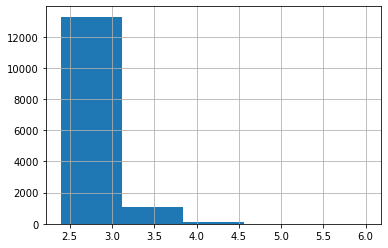

In [21]:
data['ceiling_height'].hist(bins=5);

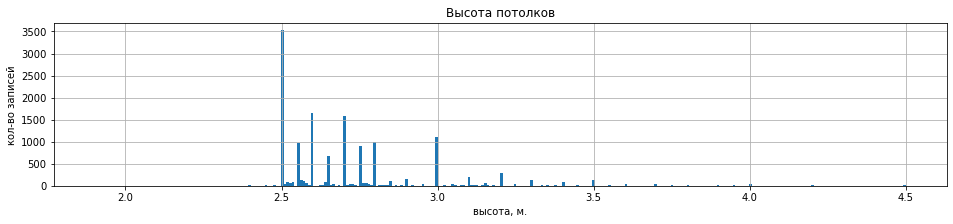

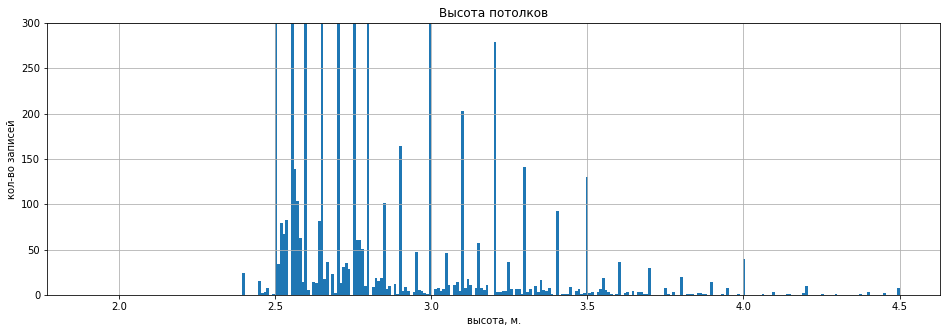

In [22]:
# построим график значений для столбца с высотой потолков

data['ceiling_height'] = pd.to_numeric(data['ceiling_height'], errors='ignore')

(
    data['ceiling_height']
        .sort_values()
        .plot(y='ceiling_height', kind='hist', 
              bins=300, range=(1.9,4.5), grid=True, title='Высота потолков', figsize=(16,3))        
        .set( ylabel = 'кол-во записей', xlabel = 'высота, м.')
)
plt.show()
(
    data['ceiling_height']
        .sort_values()
        .plot(y='ceiling_height', kind='hist', 
              bins=300, range=(1.9,4.5), grid=True, title='Высота потолков', figsize=(16,5))
        .set(ylim = (0, 300), ylabel = 'кол-во записей', xlabel = 'высота, м.')
        
)
plt.show()

##### Жилая площадь и площадь кухни
Пропуски в колонках "living_area" и "kitchen_area" скорее всего из-за человеческого фактора: пользователи просто не помнят или не знают площадь жилого пространства или кухни в квартире. Обычно общую площадь знают все собственники квартир, а жилую - нет. Нам не высчитать жилую площадь, так как мы не знаем площадь каждой комнаты, кухни и санузлов. Оставим эти пропуски.

##### Расстояние до парков и водоемов
Очень много пропусков в столбцах "parks_nearest" и "ponds_nearest". Это расстояния в метрах от квартиры до ближайшего парка или водоема. Эти данные заполняются автоматически, если пользователь в объявлении указал количество парков или водоемов в соответствующих колонках. Пустые значения в колонках с количеством парков и водоемов мы заполнили 0. В теории количество нулей должно равняться количеству пропусков в автоматически заполненных колонках. Проверим.

In [23]:
# количество значений 0 в колонке ponds_around3000 совпадает с количеством пропусков в ponds_nearest
data.query('ponds_around3000 == 0').count()

total_images            14589
last_price              14589
total_area              14589
first_day_exposition    14589
rooms                   14589
ceiling_height           8750
floors_total            14552
living_area             13381
floor                   14589
is_apartment            14589
studio                  14589
open_plan               14589
kitchen_area            13155
balcony                 14589
locality_name           14565
airports_nearest         9055
city_centers_nearest     9070
parks_around3000        14589
parks_nearest            3255
ponds_around3000        14589
ponds_nearest               0
days_exposition         12624
dtype: int64

In [24]:
''' количество значений 0 в колонке parks_around3000  почти совпадает с количеством пропусков в parks_nearest 
(разница на 4 значения - видимо техническая ошибка при автоматическом заполнении данных)'''
data.query('parks_around3000 == 0').count()

total_images            15624
last_price              15624
total_area              15624
first_day_exposition    15624
rooms                   15624
ceiling_height           9190
floors_total            15572
living_area             14298
floor                   15624
is_apartment            15624
studio                  15624
open_plan               15624
kitchen_area            14036
balcony                 15624
locality_name           15590
airports_nearest        10102
city_centers_nearest    10106
parks_around3000        15624
parks_nearest               4
ponds_around3000        15624
ponds_nearest            4290
days_exposition         13588
dtype: int64

##### Расстояние до аэропорта и центра города
Колонки "airports_nearest" и "city_centers_nearest" заполняются автоматически при создании объявления.

In [25]:
# сделаем выборку для всех населенных пунктов не СПБ
nospb = data[data['locality_name'] != 'Санкт-Петербург']

# теперь выберем из прошлой выборки те, у кого не заполнены ячейки в расстоянии до аэропорта = итого 5457 строк
noair = nospb[nospb['airports_nearest'].isna()]
noair

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.00
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.00
12,10,"3,890,000.00",54.00,2016-06-30T00:00:00,2,NaN,5.00,30.00,5,False,...,9.00,0,Сертолово,NaN,NaN,0,NaN,0,NaN,90.00
22,20,"5,000,000.00",58.00,2017-04-24T00:00:00,2,2.75,25.00,30.00,15,False,...,11.00,2,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,60.00
30,12,"2,200,000.00",32.80,2018-02-19T00:00:00,1,NaN,9.00,NaN,2,False,...,NaN,0,Коммунар,NaN,NaN,0,NaN,0,NaN,63.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,"2,100,000.00",62.80,2018-09-18T00:00:00,4,2.50,5.00,45.50,3,False,...,5.50,0,посёлок Дзержинского,NaN,NaN,0,NaN,0,NaN,NaN
23692,2,"1,350,000.00",30.00,2017-07-07T00:00:00,1,NaN,5.00,17.50,4,False,...,6.00,0,Тихвин,NaN,NaN,0,NaN,0,NaN,413.00
23695,14,"3,100,000.00",59.00,2018-01-15T00:00:00,3,NaN,5.00,38.00,4,False,...,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.00
23696,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,False,...,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN


Повторим действия для СПб для самопроверки: итого 85 строк (все верно).

In [26]:
spb = data[data['locality_name'] == 'Санкт-Петербург']
sbp_no_air = spb[spb['airports_nearest'].isna()]
sbp_no_air

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
81,9,"10,949,000.00",68.00,2018-12-27T00:00:00,1,NaN,10.00,NaN,6,False,...,NaN,0,Санкт-Петербург,NaN,NaN,0,NaN,0,NaN,NaN
593,20,"4,200,000.00",38.30,2019-04-16T00:00:00,1,2.60,16.00,19.80,10,False,...,10.10,2,Санкт-Петербург,NaN,NaN,0,NaN,0,NaN,NaN
604,11,"9,899,000.00",101.00,2018-12-12T00:00:00,3,3.00,5.00,62.00,3,False,...,15.00,0,Санкт-Петербург,NaN,NaN,0,NaN,0,NaN,NaN
733,18,"18,700,000.00",109.70,2018-02-03T00:00:00,3,2.75,21.00,57.20,13,False,...,15.30,1,Санкт-Петербург,NaN,"13,355.00",1,735.00,0,NaN,112.00
742,7,"37,000,000.00",161.00,2016-05-22T00:00:00,3,NaN,9.00,84.00,8,False,...,NaN,0,Санкт-Петербург,NaN,NaN,0,NaN,0,NaN,402.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21955,19,"130,000,000.00",431.00,2017-10-02T00:00:00,7,3.70,8.00,220.00,5,False,...,20.00,5,Санкт-Петербург,NaN,NaN,0,NaN,0,NaN,161.00
22554,5,"3,415,000.00",31.65,2019-04-16T00:00:00,1,NaN,24.00,NaN,14,False,...,8.70,2,Санкт-Петербург,NaN,NaN,0,NaN,0,NaN,NaN
22628,8,"8,600,000.00",74.90,2019-03-14T00:00:00,3,3.00,5.00,53.20,4,False,...,8.00,1,Санкт-Петербург,NaN,NaN,0,NaN,0,NaN,NaN
22790,8,"5,600,000.00",47.00,2017-09-27T00:00:00,1,NaN,23.00,21.00,7,False,...,11.00,1,Санкт-Петербург,NaN,"13,355.00",1,735.00,0,NaN,10.00


In [27]:
# теперь выберем из прошлой выборки те, у кого не заполнены ячейки в расстоянии до центра города = итого 5458 строк
nocenter = nospb[nospb['city_centers_nearest'].isna()]
nocenter

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.00
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.00
12,10,"3,890,000.00",54.00,2016-06-30T00:00:00,2,NaN,5.00,30.00,5,False,...,9.00,0,Сертолово,NaN,NaN,0,NaN,0,NaN,90.00
22,20,"5,000,000.00",58.00,2017-04-24T00:00:00,2,2.75,25.00,30.00,15,False,...,11.00,2,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,60.00
30,12,"2,200,000.00",32.80,2018-02-19T00:00:00,1,NaN,9.00,NaN,2,False,...,NaN,0,Коммунар,NaN,NaN,0,NaN,0,NaN,63.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,"2,100,000.00",62.80,2018-09-18T00:00:00,4,2.50,5.00,45.50,3,False,...,5.50,0,посёлок Дзержинского,NaN,NaN,0,NaN,0,NaN,NaN
23692,2,"1,350,000.00",30.00,2017-07-07T00:00:00,1,NaN,5.00,17.50,4,False,...,6.00,0,Тихвин,NaN,NaN,0,NaN,0,NaN,413.00
23695,14,"3,100,000.00",59.00,2018-01-15T00:00:00,3,NaN,5.00,38.00,4,False,...,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.00
23696,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,False,...,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN


Итог: Всего пропусков в колонке "airports_nearest" 5542. Из них 5457 - это пропуски для разных населенных пунктов, не СПб. Аналогичная ситуация с пропусками расстояния до центра города. Пропуски появляются по технической причине. Нужно передать информацию в тех.отдел. 

##### Населенный пункт
Расмотрим столбец locality_name.

In [28]:
data['locality_name'].unique()
# выведем строки с пропущенными значениями населенного пункта 
data.loc[data['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,"8,600,000.00",81.70,2016-04-15T00:00:00,3,3.55,5.00,50.80,2,False,...,8.80,0,NaN,"23,478.00","4,258.00",0,NaN,0,NaN,147.00
2033,6,"5,398,000.00",80.00,2017-05-30T00:00:00,3,NaN,4.00,42.60,2,False,...,18.60,0,NaN,NaN,NaN,0,NaN,0,NaN,34.00
2603,20,"3,351,765.00",42.70,2015-09-20T00:00:00,1,NaN,24.00,15.60,3,False,...,10.70,0,NaN,"22,041.00","17,369.00",0,NaN,1,374.00,276.00
2632,2,"5,130,593.00",62.40,2015-10-11T00:00:00,2,NaN,24.00,33.10,21,False,...,8.20,0,NaN,"22,041.00","17,369.00",0,NaN,1,374.00,256.00
3574,10,"4,200,000.00",46.50,2016-05-28T00:00:00,2,NaN,5.00,30.80,5,False,...,6.50,0,NaN,"27,419.00","8,127.00",0,NaN,1,603.00,45.00
4151,17,"17,600,000.00",89.50,2014-12-09T00:00:00,2,3.00,8.00,39.62,7,False,...,13.38,0,NaN,"25,054.00","3,902.00",1,485.00,3,722.00,869.00
4189,7,"9,200,000.00",80.00,2015-12-10T00:00:00,3,4.00,4.00,52.30,3,False,...,10.40,0,NaN,"21,774.00","3,039.00",1,690.00,1,953.00,223.00
4670,1,"5,500,000.00",83.00,2015-08-14T00:00:00,3,NaN,7.00,NaN,6,False,...,NaN,0,NaN,"26,534.00","5,382.00",1,446.00,1,376.00,350.00
5343,19,"13,540,000.00",85.50,2016-01-20T00:00:00,3,NaN,7.00,59.10,5,False,...,8.30,4,NaN,"10,556.00","9,538.00",1,67.00,0,NaN,303.00
5707,7,"3,700,000.00",30.00,2016-04-29T00:00:00,1,NaN,24.00,20.00,23,False,...,NaN,0,NaN,"21,460.00","16,788.00",0,NaN,1,170.00,49.00


По известным данным из датасета трудно установить, к какому населенному пункту принадлежат эти строки: абсолютно разные расстояния до центра города или до аэропорта. Таких строк всего 49 - лучше их совсем удалить, их данные на фоне всего датасета не изменят дальнейшие вычисления.

In [29]:
data = data.dropna(subset=['locality_name'])
# Проверим количество строк и заодно пропуски
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14460 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  int8   
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

##### Количество этажей в доме
Рассмотрим колонку с общим количеством этажей в доме. Есть значения от 1 до 60. Также есть незаполненные данные. Логично, что количество этажей в доме не может быть больше, чем указанный этаж квартиры (в нашем датасете все этажи квартир заполнены). Идеальным вариантом было бы подтянуть информацию из базы данных кадастрового учета, но у нас нет адресов домов.
Для нашей поставленной задачи нам нужна будет информация о количестве этажей в доме. Всего пропусков в этих данных 86. Это не очень много для всего датасета. Поэтому заполним количество этажей в доме номером этажа квартиры. Затем проверим результат заполнения и полученные уникальные значения: в строке 237 было пустое значение, заменили на 1 - этаж квартиры в доме.

In [30]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])
data['floors_total'].head(240)

0     16.00
1     11.00
2      5.00
3     14.00
4     14.00
       ... 
235    3.00
236   14.00
237    1.00
238   24.00
239    5.00
Name: floors_total, Length: 240, dtype: float64

In [31]:
# пропусков больше нет
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15.,  1., 20.,
       28., 36., 21., 35., 34., 60., 29., 33., 52., 37.])

##### Дни продажи квартиры
И последний столбец с пропусками "days_exposition". Пропусков достаточно много - 3180 ячеек. 

Максимальное значение - 1580 дней, минимальное - 1 день. Если найти среднее значение - получается 180 дней. Медиана - 95 дней. Заполнять пустые данные любыми из этих значений, на мой взгляд, некорректно для дальнейших вычислений - слишком большой разброс данных. Оставим их пустыми.

Если эти данные заполняются автоматически при продаже квартиры (квартира автоматически снимается с продажи) - значит это техническая ошибка и нужно о ней сообщить в тех.отдел. Если владелец квартиры вручную удаляет объявление о продаже после сделки, тут мы не можем ничего сделать, кроме как периодически уточнять у владельца (через менеджера, рассылкой-письмом, пуш-уведомлением), актуально ли объявление.

In [32]:
print(data['days_exposition'].unique()) # список уникальных значений
print(data['days_exposition'].nunique()) # количество уникальных значений
print(data['days_exposition'].max()) # максимальное значение
print(data['days_exposition'].min()) # минимальное значение
print(data['days_exposition'].mean()) # среднее значение
print(data['days_exposition'].median()) # медиана

[  nan   81.  558. ... 1360. 1007.  971.]
1141
1580.0
1.0
180.7531998045921
95.0


#### Изменение типов данных
Теперь приступим к типам данных. Для начала еще раз откроем информацию о всех колонках и их типах.

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14460 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  int8   
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Столбцы "total_images", "rooms", "floor", "floors_total" можно заменить на тип int8 вместо int64 для уменьшения размера файла. Размер файла составил 2.6+ MB вместо 3.2+ MB. Уменьшили размер файла примерно на 30%.

In [34]:
data['total_images'] = data['total_images'].astype('int8')
data['rooms'] = data['rooms'].astype('int8')
data['floor'] = data['floor'].astype('int8')
data['floors_total'] = data['floors_total'].astype('int8')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int8   
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int8   
 5   ceiling_height        14460 non-null  float64
 6   floors_total          23650 non-null  int8   
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int8   
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  int8   
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Столбец "first_day_exposition" имеет тип object, а должен быть datetime, так как в нем хранится дата и время размещения объявления. Изменим.

In [36]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], \
                                              format='%Y-%m-%dT%H:%M:%S')
# Проверим результат
data.info()
data['first_day_exposition'].head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int8          
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int8          
 5   ceiling_height        14460 non-null  float64       
 6   floors_total          23650 non-null  int8          
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int8          
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
5   2018-09-10
6   2017-11-02
7   2019-04-18
8   2018-05-23
9   2017-02-26
Name: first_day_exposition, dtype: datetime64[ns]

Теперь все типы данных приведены к нужным :) 

#### Удаление неявных дубликатов
Следующий шаг - удаление неявных дубликатов в данных в столбце названий населенных пунктов "locality_name". 

In [37]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [38]:
data['locality_name'].nunique()

364

Сначала заменим все буквы "ё" на "е" - этим мы уберем дубликаты в словах "посёлок" и "поселок". Стало 330 уникальных значений вместо 364.

In [39]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
print(data['locality_name'].unique())
data['locality_name'].nunique()

['Санкт-Петербург' 'поселок Шушары' 'городской поселок Янино-1'
 'поселок Парголово' 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'деревня Федоровское'
 'Выборг' 'Кронштадт' 'Кировск' 'деревня Новое Девяткино'
 'поселок Металлострой' 'поселок городского типа Лебяжье'
 'поселок городского типа Сиверский' 'поселок Молодцово'
 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок городского типа Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'

330

Теперь заменим "поселок городского типа" на просто "поселок". Стало 329 значений.

In [40]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'].nunique()

329

In [41]:
# заменим "городской поселок" на "поселок" - стало 322 значения.
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'].nunique()

322

In [42]:
# заменим "коттеджный поселок" на "поселок" - стало 321 значения.
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')
print(data['locality_name'].unique())
data['locality_name'].nunique()

['Санкт-Петербург' 'поселок Шушары' 'поселок Янино-1' 'поселок Парголово'
 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин'
 'деревня Кудрово' 'Коммунар' 'Колпино' 'поселок Красный Бор' 'Гатчина'
 'деревня Федоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'поселок Металлострой' 'поселок Лебяжье'
 'поселок Сиверский' 'поселок Молодцово' 'поселок Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'
 'Кудрово' 'поселок Романовка' 'поселок Бугры' 'поселок Рощино' 'Кириши'
 'Луга' 'Волосово'

321

В идеале надо бы отделить тип населенного пункта (если есть) от названия. В этом случае будет легче искать дубликаты. Но в данном учебном проекте остановимся на этом результате. Уникальных значений осталось 321 вместо 364.

#### Аномалии и редкие значения
Проверим оставшиеся столбцы на аномалии или редкие значения.

In [43]:
# выведем все значения столбцов
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [44]:
# Количество изображений в объявлений от 0 до 50
data['total_images'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35,
       37, 39, 42, 50], dtype=int8)

In [45]:
# Максимальная и минимальная цена за квартиру 
print(data['last_price'].max())
data['last_price'].min()

763000000.0


12190.0

In [46]:
# Вывели все квартиры с ценой меньше 400К.
data[data['last_price'] < 400000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,"12,190.00",109.00,2019-03-20,2,2.75,25,32.00,25,False,...,40.50,0,Санкт-Петербург,"36,421.00","9,176.00",1,805.00,0,NaN,8.00


Обнаружили аномалию - цена квартиры 12190 руб с общей площадью 109 кв.метров. Выведем все квартиры с площадью в 109 кв.метров.

In [47]:
# все квартиры площадью 109 кв.метров
display(data[data['total_area'] == 109])
# посчитаем среднюю цену за такие квартиры - 15 млн.руб
data[data['total_area'] == 109]['last_price'].mean()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2452,7,"10,500,000.00",109.00,2019-02-20,4,2.83,5,79.40,4,False,...,9.20,0,Санкт-Петербург,"25,860.00","4,708.00",0,NaN,1,691.00,NaN
3614,8,"8,300,000.00",109.00,2017-09-28,3,2.60,16,68.00,3,False,...,14.00,0,Санкт-Петербург,"18,750.00","22,175.00",0,NaN,1,649.00,318.00
5035,11,"13,200,000.00",109.00,2018-09-10,4,3.15,5,72.00,2,False,...,12.20,0,Санкт-Петербург,"42,683.00","8,643.00",0,NaN,0,NaN,NaN
5198,8,"13,500,000.00",109.00,2018-04-01,4,3.00,7,71.00,5,False,...,11.00,0,Санкт-Петербург,"26,191.00","4,893.00",0,NaN,1,"1,018.00",NaN
7186,15,"25,000,000.00",109.00,2018-03-23,3,3.50,6,80.00,6,False,...,20.00,0,Санкт-Петербург,"24,904.00","5,472.00",2,310.00,0,NaN,317.00
8793,7,"12,190.00",109.00,2019-03-20,2,2.75,25,32.00,25,False,...,40.50,0,Санкт-Петербург,"36,421.00","9,176.00",1,805.00,0,NaN,8.00
10601,15,"10,900,000.00",109.00,2017-02-01,3,3.00,25,49.00,7,False,...,16.00,5,Санкт-Петербург,"40,584.00","12,398.00",3,447.00,0,NaN,472.00
11843,20,"16,500,000.00",109.00,2017-01-19,3,2.80,16,72.00,3,False,...,20.00,4,Санкт-Петербург,"18,863.00","16,028.00",1,482.00,2,755.00,369.00
12771,9,"14,400,000.00",109.00,2019-03-14,3,2.50,21,44.80,18,False,...,12.20,2,Санкт-Петербург,"13,275.00","12,071.00",0,NaN,0,NaN,NaN
14143,20,"25,000,000.00",109.00,2018-02-22,2,3.00,6,31.90,5,False,...,43.80,0,Санкт-Петербург,"24,194.00","4,327.00",0,NaN,0,NaN,370.00


15074008.636363637

In [48]:
#Скорее всего пользователь ошибся в вещественной записи числа цены, исправим цену.
data['last_price'] = data['last_price'].where((data['last_price'] != 12190), 12190000)
data[data['total_area'] == 109]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2452,7,"10,500,000.00",109.00,2019-02-20,4,2.83,5,79.40,4,False,...,9.20,0,Санкт-Петербург,"25,860.00","4,708.00",0,NaN,1,691.00,NaN
3614,8,"8,300,000.00",109.00,2017-09-28,3,2.60,16,68.00,3,False,...,14.00,0,Санкт-Петербург,"18,750.00","22,175.00",0,NaN,1,649.00,318.00
5035,11,"13,200,000.00",109.00,2018-09-10,4,3.15,5,72.00,2,False,...,12.20,0,Санкт-Петербург,"42,683.00","8,643.00",0,NaN,0,NaN,NaN
5198,8,"13,500,000.00",109.00,2018-04-01,4,3.00,7,71.00,5,False,...,11.00,0,Санкт-Петербург,"26,191.00","4,893.00",0,NaN,1,"1,018.00",NaN
7186,15,"25,000,000.00",109.00,2018-03-23,3,3.50,6,80.00,6,False,...,20.00,0,Санкт-Петербург,"24,904.00","5,472.00",2,310.00,0,NaN,317.00
8793,7,"12,190,000.00",109.00,2019-03-20,2,2.75,25,32.00,25,False,...,40.50,0,Санкт-Петербург,"36,421.00","9,176.00",1,805.00,0,NaN,8.00
10601,15,"10,900,000.00",109.00,2017-02-01,3,3.00,25,49.00,7,False,...,16.00,5,Санкт-Петербург,"40,584.00","12,398.00",3,447.00,0,NaN,472.00
11843,20,"16,500,000.00",109.00,2017-01-19,3,2.80,16,72.00,3,False,...,20.00,4,Санкт-Петербург,"18,863.00","16,028.00",1,482.00,2,755.00,369.00
12771,9,"14,400,000.00",109.00,2019-03-14,3,2.50,21,44.80,18,False,...,12.20,2,Санкт-Петербург,"13,275.00","12,071.00",0,NaN,0,NaN,NaN
14143,20,"25,000,000.00",109.00,2018-02-22,2,3.00,6,31.90,5,False,...,43.80,0,Санкт-Петербург,"24,194.00","4,327.00",0,NaN,0,NaN,370.00


In [49]:
data['last_price'].describe()

count        23,650.00
mean      6,541,641.82
std      10,896,378.37
min         430,000.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,799,000.00
max     763,000,000.00
Name: last_price, dtype: float64

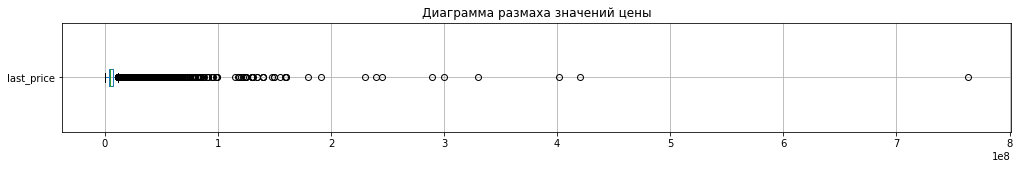

In [50]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['last_price']].boxplot(vert = False, ax = ax)
ax.set_title('Диаграмма размаха значений цены');

По диаграмме размаха видно, что очень много выбросов. 99-й процентиль нашего датасета - это цены от 36 млн.руб.

In [51]:
data['last_price'].quantile(.99)

36000000.0

Удалим сначала все квартиры со стоимостью выше 200 млн, чтобы было детальнее видно диаграмму.

In [52]:
data = data.loc[data['last_price'] <= 200000000]

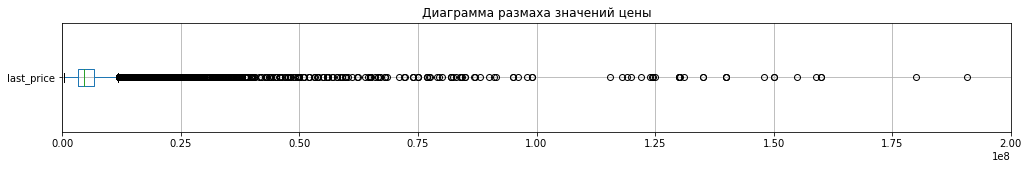

In [53]:
# Повторим
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['last_price']].boxplot(vert = False, ax = ax)
ax.set_title('Диаграмма размаха значений цены')
ax.set_xlim(0, 200_000_000);

Не так много "выбросов" после 100 млн - 28 штук, удалим эти квартиры.

In [54]:
data[data['last_price'] > 100000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
793,20,"135,000,000.00",310.00,2018-05-22,4,3.30,5,250.00,2,False,...,50.00,0,Санкт-Петербург,"34,159.00","7,251.00",2,295.00,3,190.00,342.00
1026,20,"155,000,000.00",310.00,2018-10-12,5,5.30,3,190.00,3,False,...,63.00,2,Санкт-Петербург,"24,899.00","4,785.00",0,NaN,1,603.00,NaN
1188,20,"118,000,000.00",290.60,2018-06-01,6,3.82,6,188.70,3,False,...,22.00,1,Санкт-Петербург,"25,309.00","6,224.00",1,217.00,0,NaN,316.00
1300,14,"120,000,000.00",280.00,2018-07-12,5,4.70,4,162.00,3,False,...,30.00,0,Санкт-Петербург,"24,680.00","4,247.00",1,464.00,3,339.00,225.00
1928,11,"125,000,000.00",224.50,2017-01-24,4,NaN,4,163.50,3,False,...,30.00,1,Санкт-Петербург,"22,805.00","2,335.00",0,NaN,2,497.00,174.00
2243,9,"130,278,280.00",304.00,2015-07-24,5,3.11,9,NaN,7,False,...,NaN,0,Санкт-Петербург,"25,593.00","5,913.00",2,164.00,0,NaN,599.00
2536,16,"159,984,000.00",242.40,2015-08-27,4,3.85,9,131.00,7,False,...,20.00,0,Санкт-Петербург,"21,946.00","2,242.00",1,679.00,1,227.00,501.00
3117,19,"140,000,000.00",631.00,2019-03-30,7,NaN,5,NaN,5,False,...,60.00,0,Санкт-Петербург,"25,707.00","4,972.00",0,NaN,2,210.00,NaN
4996,20,"124,000,000.00",124.50,2017-10-12,4,3.00,4,67.20,2,False,...,20.00,0,Санкт-Петербург,"20,399.00","1,722.00",3,302.00,3,172.00,45.00
7543,20,"130,000,000.00",307.80,2016-04-24,5,NaN,4,187.90,3,False,...,63.40,0,Санкт-Петербург,"24,899.00","4,785.00",0,NaN,1,603.00,"1,094.00"


In [55]:
data = data.loc[data['last_price'] <= 100000000]

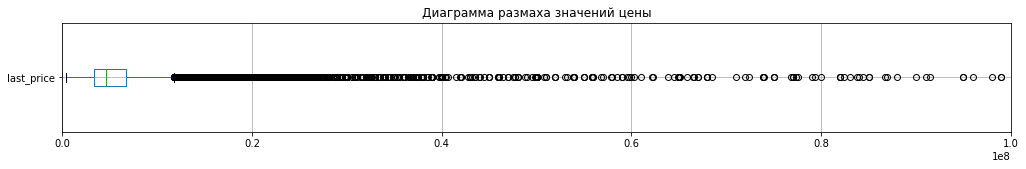

In [56]:
# Повторим
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['last_price']].boxplot(vert = False, ax = ax)
ax.set_title('Диаграмма размаха значений цены')
ax.set_xlim(0, 100_000_000);

По диаграмме размаха видно, что самые редкие выбросы как раз попадают в 99-й процентиль (от 36 млн). Избавимся от этих квартир для более точных вычислений.

In [57]:
data = data.loc[data['last_price'] <= 36000000]
data.shape[0]

23414

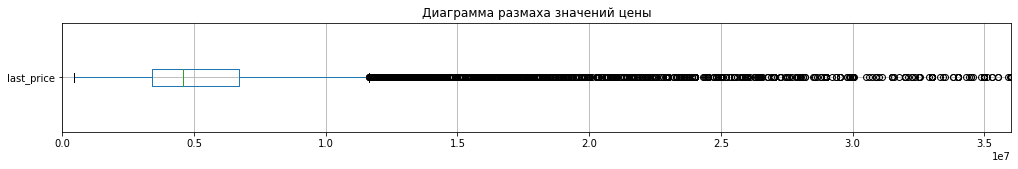

In [58]:
# Повторим
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['last_price']].boxplot(vert = False, ax = ax)
ax.set_title('Диаграмма размаха значений цены')
ax.set_xlim(0, 36_000_000);

In [59]:
data['last_price'].describe()

count       23,414.00
mean     5,836,101.03
std      4,345,538.22
min        430,000.00
25%      3,400,000.00
50%      4,600,000.00
75%      6,699,750.00
max     36,000,000.00
Name: last_price, dtype: float64

В получившейся выборке медианное значение цены квартиры - 4,6 млн.руб, максимальное - 36 млн. Так как рассматриваются квартиры в СПб и ЛО, такие цены на квартиры не будут вызывать сильное удивление у покупателей.

In [60]:
# уникальные значения общей площади квартиры. Максимальная площадь - 470 кв. метров. Минимальная - 12.
data['total_area'].sort_values().unique()

array([ 12.  ,  13.  ,  13.2 , ..., 441.98, 460.8 , 470.3 ])

По СНиП минимальная площадь жилой квартиры с одной комнатой может быть 14 кв.метров. В нашем датасете есть 5 квартир со значением меньше 14. Возможно эти изменения получились в следствии перепланировки квартиры. Поэтому оставим данные как есть.

In [61]:
# Вывели квартиры с общей площадью меньше 14 кв.метров.
data[data['total_area'] < 14]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17961,3,"1,400,000.00",13.00,2017-12-03,1,2.60,9,NaN,1,False,...,NaN,0,Санкт-Петербург,"14,350.00","15,945.00",0,NaN,1,185.00,410.00
19546,3,"1,850,000.00",13.00,2019-03-11,1,3.40,5,NaN,2,False,...,NaN,0,Санкт-Петербург,"24,915.00","5,483.00",1,644.00,0,NaN,24.00
19558,2,"1,686,000.00",13.20,2018-12-17,1,NaN,5,NaN,1,False,...,NaN,0,Санкт-Петербург,"19,891.00","4,165.00",1,361.00,1,155.00,19.00
19807,0,"3,800,000.00",13.00,2018-07-04,1,NaN,5,10.00,3,False,...,NaN,0,Санкт-Петербург,"21,302.00","1,242.00",1,592.00,3,27.00,9.00
19904,4,"2,400,000.00",12.00,2017-07-19,1,2.55,5,10.00,2,False,...,NaN,0,Санкт-Петербург,"21,314.00",964.00,1,886.00,2,45.00,200.00


In [62]:
data['total_area'].describe()

count   23,414.00
mean        58.66
std         29.41
min         12.00
25%         40.00
50%         51.72
75%         68.80
max        470.30
Name: total_area, dtype: float64

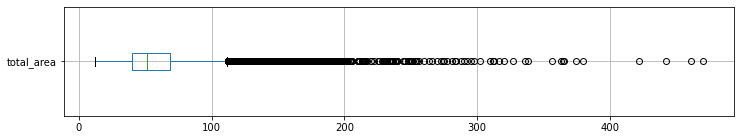

In [63]:
data.boxplot(column='total_area', figsize=(12, 2), vert=False);

Средняя (медианная) площадь продаваемых квартир - 52 кв.м. Максимальная - 470. На диаграмме размаха видно, что площадь выше 300 кв.метров - это редкие выбросы. Очистим датасет от этих квартир.

In [64]:
data = data.loc[data['total_area'] <= 300]
data.shape[0]

23395

In [65]:
# в датасете список объявлений с 27.11.2014 по 03.05.2019 годов
data['first_day_exposition'].sort_values().unique()

array(['2014-11-27T00:00:00.000000000', '2014-11-29T00:00:00.000000000',
       '2014-12-04T00:00:00.000000000', ...,
       '2019-05-01T00:00:00.000000000', '2019-05-02T00:00:00.000000000',
       '2019-05-03T00:00:00.000000000'], dtype='datetime64[ns]')

In [66]:
# Количество комнат от 0 до 16.
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 14, 16], dtype=int8)

In [67]:
data['rooms'].value_counts()

1     8033
2     7908
3     5729
4     1116
5      278
0      196
6       79
7       39
8        7
9        4
11       2
10       2
16       1
14       1
Name: rooms, dtype: int64

In [68]:
data['rooms'].describe()

count   23,395.00
mean         2.04
std          1.03
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         16.00
Name: rooms, dtype: float64

Квартир с 4-мя и больше комнат всего 25%. Квартир свыше 7 комнат достаточно мало. Удалим их.

In [69]:
data = data.loc[data['rooms'] <= 7]
data.shape[0]

23378

Квартир с нулем комнат 196 штук. Рассчитали медиану и среднее значение общей площади таких квартир - 26 и 27,5 метров. Логично предположить, что в этих квартирах 1 комната. Заменим все значения 0 на 1.

In [70]:
display(data[data['rooms'] == 0])
print(data[data['rooms'] == 0]['total_area'].median())
print(data[data['rooms'] == 0]['total_area'].mean())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,"2,450,000.00",27.00,2017-03-30,0,NaN,24,15.50,2,False,...,NaN,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,181.00
349,4,"2,320,000.00",25.00,2017-09-27,0,NaN,14,17.00,1,False,...,NaN,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45.00
440,8,"2,480,000.00",27.11,2018-03-12,0,NaN,17,24.75,4,False,...,NaN,2,Санкт-Петербург,"38,171.00","15,015.00",0,NaN,2,982.00,64.00
508,0,"3,375,000.00",34.40,2017-03-28,0,NaN,26,24.30,19,False,...,NaN,1,поселок Парголово,"53,115.00","19,292.00",0,NaN,1,593.00,430.00
608,2,"1,850,000.00",25.00,2019-02-20,0,NaN,10,NaN,7,False,...,NaN,0,поселок Шушары,NaN,NaN,0,NaN,0,NaN,29.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,"3,200,000.00",26.00,2017-09-01,0,NaN,25,18.00,16,False,...,NaN,0,Санкт-Петербург,"11,405.00","13,222.00",0,NaN,1,623.00,14.00
23442,0,"2,500,000.00",27.70,2017-09-28,0,NaN,24,18.00,4,False,...,NaN,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,4.00
23554,15,"3,350,000.00",26.00,2018-09-07,0,NaN,19,NaN,8,False,...,NaN,0,Санкт-Петербург,"18,090.00","17,092.00",0,NaN,2,112.00,31.00
23592,10,"1,450,000.00",29.00,2017-11-11,0,NaN,9,18.00,8,False,...,NaN,2,Никольское,NaN,NaN,0,NaN,0,NaN,82.00


26.025
27.536275510204092


In [71]:
# заменяем значение количества комнат 0 на 1 и проверяем
data['rooms'] = data['rooms'].where((data['rooms'] != 0), 1)
data['rooms'].sort_values().unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int8)

In [72]:
# Общее количество этажей в доме от 1 до 60
data['floors_total'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37,
       52, 60], dtype=int8)

In [73]:
data['floors_total'].describe()

count   23,378.00
mean        10.71
std          6.61
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64

In [74]:
# квартир в домах 16-ти и больше этажей 4630 - это достаточно много для нашего датасета 
data[data['floors_total'] > 16]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
6,6,"3,700,000.00",37.30,2017-11-02,1,NaN,26,10.60,6,False,...,14.40,1,поселок Парголово,"52,996.00","19,143.00",0,NaN,0,NaN,155.00
7,5,"7,915,000.00",71.60,2019-04-18,2,NaN,24,NaN,22,False,...,18.90,2,Санкт-Петербург,"23,982.00","11,634.00",0,NaN,0,NaN,NaN
8,20,"2,900,000.00",33.16,2018-05-23,1,NaN,27,15.43,26,False,...,8.81,0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,189.00
17,6,"4,180,000.00",36.00,2016-09-09,1,NaN,17,16.50,7,False,...,11.00,1,Санкт-Петербург,"33,564.00","14,616.00",0,NaN,1,859.00,571.00
20,12,"6,120,000.00",80.00,2017-09-28,3,2.70,27,48.00,11,False,...,12.00,2,поселок Парголово,"53,134.00","19,311.00",0,NaN,0,NaN,74.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23666,9,"8,150,000.00",80.00,2016-04-17,3,NaN,17,44.90,12,False,...,11.40,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,286.00
23667,14,"9,990,000.00",90.00,2017-01-23,3,3.06,17,55.00,9,False,...,11.00,2,Сестрорецк,"56,343.00","33,272.00",0,NaN,1,545.00,86.00
23684,20,"21,400,000.00",145.00,2018-11-02,4,3.00,26,71.40,17,False,...,15.60,0,Санкт-Петербург,"11,827.00","11,459.00",0,NaN,0,NaN,NaN
23691,11,"9,470,000.00",72.90,2016-10-13,2,2.75,25,40.30,7,False,...,10.60,1,Санкт-Петербург,"19,424.00","4,489.00",0,NaN,1,806.00,519.00


In [75]:
# Посчитаем, сколько квартир в разных по числу этажей домов
data['floors_total'].value_counts()

5     5727
9     3743
16    1372
12    1358
4     1178
10    1167
25    1074
6      876
17     834
3      659
7      558
14     553
18     507
24     464
2      380
15     366
8      353
23     349
19     342
22     287
20     269
13     230
11     200
27     164
21     162
26     124
1       28
35      24
28      21
36       3
34       1
60       1
29       1
33       1
52       1
37       1
Name: floors_total, dtype: int64

Квартиры в домах с 29 и больше этажами очень мало, удалим эти квартиры.

In [76]:
data = data.loc[data['floors_total'] <= 28]
data.shape[0]

23345

Выведем уникальные значения жилой площади. Минимальное значение - 2 метра. Согласно действующим СНиПам, минимальная площадь комнаты должна быть не менее 8 квадратных метров. Значит эти данные ложные/неверные. Рассмотрим эти квартиры.

In [77]:
data['living_area'].sort_values().unique()

array([  2.,   3.,   5., ..., 200., 211.,  nan])

Вывели квартиры с жилой площадью меньше 8 квадратных метров - 7 штук. Удалим их

In [78]:
# проверим кол-во строк с пустыми значениями жилой площади - 1864
data[data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7,5,"7,915,000.00",71.60,2019-04-18,2,NaN,24,NaN,22,False,...,18.90,2,Санкт-Петербург,"23,982.00","11,634.00",0,NaN,0,NaN,NaN
30,12,"2,200,000.00",32.80,2018-02-19,1,NaN,9,NaN,2,False,...,NaN,0,Коммунар,NaN,NaN,0,NaN,0,NaN,63.00
37,10,"1,990,000.00",45.80,2017-10-28,2,2.50,5,NaN,1,False,...,NaN,0,поселок Красный Бор,NaN,NaN,0,NaN,0,NaN,196.00
44,13,"5,350,000.00",40.00,2018-11-18,1,NaN,22,NaN,3,False,...,NaN,1,Санкт-Петербург,"30,471.00","11,603.00",1,620.00,1,"1,152.00",NaN
59,15,"6,300,000.00",46.50,2017-03-06,1,NaN,13,NaN,13,False,...,NaN,0,Санкт-Петербург,"11,125.00","14,501.00",0,NaN,0,NaN,336.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,"5,950,000.00",80.30,2018-07-03,3,2.70,12,NaN,5,False,...,NaN,0,Колпино,"27,933.00","33,719.00",0,NaN,2,562.00,60.00
23663,12,"6,400,000.00",88.00,2018-01-12,4,2.55,10,NaN,1,False,...,NaN,0,Санкт-Петербург,"33,642.00","13,943.00",0,NaN,2,844.00,59.00
23670,9,"2,450,000.00",45.60,2018-02-08,1,2.80,9,NaN,2,False,...,NaN,0,поселок Синявино,NaN,NaN,0,NaN,0,NaN,45.00
23679,0,"2,500,000.00",35.00,2017-12-08,1,NaN,9,NaN,4,False,...,NaN,0,Сосновый Бор,NaN,NaN,0,NaN,0,NaN,45.00


In [79]:
data.shape[0]

23345

In [80]:
# оставим квартиры с жилой площадью больше/равно 8 кв.м и с пустыми значениями
data = data.loc[(data['living_area'] >= 8) | (data['living_area'].isna())]
data.shape[0]

23338

In [81]:
data['living_area'].sort_values().unique()

array([  8. ,   8.3,   8.4, ..., 200. , 211. ,   nan])

In [82]:
# Посчитаем, сколько квартир на разных этажах
data['floor'].value_counts()

2     3320
3     3020
1     2895
4     2751
5     2574
6     1277
7     1187
8     1064
9     1045
10     682
12     521
11     518
13     374
15     340
14     334
16     315
17     224
18     174
19     147
21     122
20     110
22     110
23      96
24      63
25      45
26      22
27       8
Name: floor, dtype: int64

In [83]:
# Значения колонок является ли квартира апартаментами, студией или с открытой планировкой - 2 значения, как и должно быть
print(data['is_apartment'].unique())
print(data['open_plan'].unique())
print(data['studio'].unique())

[False  True]
[False  True]
[False  True]


По СНиП минимальная площадь кухни может быть 5 кв.метров. У нас есть кухни меньшей площадью - 105 квартир.

In [84]:
data['kitchen_area'].sort_values().unique()

array([  1.3 ,   2.  ,   2.3 ,   2.4 ,   2.89,   3.  ,   3.2 ,   3.3 ,
         3.4 ,   3.5 ,   3.7 ,   3.8 ,   4.  ,   4.1 ,   4.2 ,   4.3 ,
         4.4 ,   4.5 ,   4.6 ,   4.7 ,   4.8 ,   4.9 ,   5.  ,   5.04,
         5.06,   5.1 ,   5.14,   5.2 ,   5.21,   5.23,   5.25,   5.28,
         5.29,   5.3 ,   5.31,   5.33,   5.35,   5.4 ,   5.42,   5.44,
         5.47,   5.49,   5.5 ,   5.53,   5.59,   5.6 ,   5.61,   5.62,
         5.64,   5.65,   5.68,   5.7 ,   5.74,   5.75,   5.78,   5.8 ,
         5.82,   5.85,   5.86,   5.9 ,   5.91,   6.  ,   6.02,   6.03,
         6.1 ,   6.16,   6.19,   6.2 ,   6.22,   6.23,   6.24,   6.25,
         6.26,   6.27,   6.28,   6.3 ,   6.31,   6.33,   6.35,   6.36,
         6.37,   6.4 ,   6.47,   6.5 ,   6.55,   6.58,   6.6 ,   6.61,
         6.62,   6.65,   6.7 ,   6.72,   6.73,   6.76,   6.77,   6.8 ,
         6.82,   6.83,   6.84,   6.86,   6.9 ,   6.91,   6.93,   6.95,
         7.  ,   7.02,   7.03,   7.06,   7.09,   7.1 ,   7.12,   7.15,
      

In [85]:
# вывели квартиры с площадью кухни меньше 5 метров - 105 квартир. Удалим их
data[data['kitchen_area'] < 5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
76,12,"2,800,000.00",55.10,2016-05-14,3,2.60,5,38.40,1,False,...,4.90,0,Кировск,NaN,NaN,0,NaN,0,NaN,606.00
298,9,"2,650,000.00",42.80,2017-04-25,2,NaN,5,30.00,3,False,...,4.50,0,Гатчина,NaN,NaN,0,NaN,0,NaN,49.00
422,8,"1,700,000.00",55.20,2018-03-24,3,2.50,5,38.50,5,False,...,4.50,0,Кириши,NaN,NaN,0,NaN,0,NaN,NaN
906,15,"2,600,000.00",27.00,2017-07-10,1,2.75,23,18.00,18,False,...,2.00,0,Санкт-Петербург,"22,131.00","17,459.00",0,NaN,1,411.00,10.00
1327,6,"2,650,000.00",46.20,2016-12-01,2,2.50,5,29.20,5,False,...,4.90,0,Гатчина,NaN,NaN,0,NaN,0,NaN,704.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22839,14,"3,350,000.00",27.00,2018-11-03,1,2.70,16,NaN,6,False,...,4.00,2,Санкт-Петербург,"41,935.00","9,551.00",0,NaN,0,NaN,35.00
22849,6,"2,380,000.00",25.00,2016-03-22,1,NaN,25,19.00,15,False,...,4.00,1,поселок Шушары,"13,461.00","19,247.00",0,NaN,1,351.00,140.00
23110,1,"2,900,000.00",34.00,2018-02-01,2,2.90,2,20.00,1,False,...,4.00,0,поселок Стрельна,"27,006.00","23,832.00",0,NaN,2,872.00,196.00
23498,7,"1,600,000.00",54.00,2016-12-26,2,NaN,1,33.00,1,False,...,3.50,0,Высоцк,NaN,NaN,0,NaN,0,NaN,281.00


In [86]:
data.shape[0]

23338

In [87]:
# оставили квартиры с кухней больше/равно 5 кв.м и с пустыми ячейками
data = data.loc[(data['kitchen_area'] >= 5) | (data['kitchen_area'].isna())]
data.shape[0]

23233

In [88]:
data['kitchen_area'].describe()

count   21,002.00
mean        10.38
std          5.21
min          5.00
25%          7.00
50%          9.00
75%         11.95
max        100.70
Name: kitchen_area, dtype: float64

Медианное значение плоащди кухни - 9 кв.м. Менее 25% квартир имеют площадь кухни больше 12 кв.м. Максимум - 100 кв.м.

In [89]:
data['kitchen_area'].sort_values().unique()

array([  5.  ,   5.04,   5.06,   5.1 ,   5.14,   5.2 ,   5.21,   5.23,
         5.25,   5.28,   5.29,   5.3 ,   5.31,   5.33,   5.35,   5.4 ,
         5.42,   5.44,   5.47,   5.49,   5.5 ,   5.53,   5.59,   5.6 ,
         5.61,   5.62,   5.64,   5.65,   5.68,   5.7 ,   5.74,   5.75,
         5.78,   5.8 ,   5.82,   5.85,   5.86,   5.9 ,   5.91,   6.  ,
         6.02,   6.03,   6.1 ,   6.16,   6.19,   6.2 ,   6.22,   6.23,
         6.24,   6.25,   6.26,   6.27,   6.28,   6.3 ,   6.31,   6.33,
         6.35,   6.36,   6.37,   6.4 ,   6.47,   6.5 ,   6.55,   6.58,
         6.6 ,   6.61,   6.62,   6.65,   6.7 ,   6.72,   6.73,   6.76,
         6.77,   6.8 ,   6.82,   6.83,   6.84,   6.86,   6.9 ,   6.91,
         6.93,   6.95,   7.  ,   7.02,   7.03,   7.06,   7.09,   7.1 ,
         7.12,   7.15,   7.17,   7.18,   7.19,   7.2 ,   7.3 ,   7.36,
         7.4 ,   7.41,   7.48,   7.5 ,   7.54,   7.6 ,   7.63,   7.65,
         7.7 ,   7.71,   7.78,   7.8 ,   7.84,   7.85,   7.86,   7.87,
      

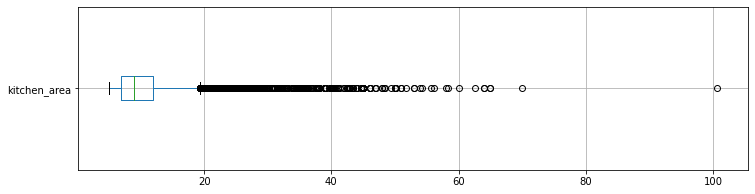

In [90]:
data.boxplot(column='kitchen_area', figsize=(12, 3), vert=False);

По ящику с усами видно, что кухни с площадью 60 кв.м и больше очень редки. Очистим датасет.

In [91]:
data = data.loc[(data['kitchen_area'] <= 60) | (data['kitchen_area'].isna())]
data.shape[0]

23226

In [92]:
# Количество балконов от 0 до 5.
data['balcony'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int8)

In [93]:
data['balcony'].describe()

count   23,226.00
mean         0.59
std          0.96
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          5.00
Name: balcony, dtype: float64

Нашли интересные квартиры с 1 комнатой и 5-ю балконами. Таких квартир 25. Это точно аномальные данные. Заменим в этих квартирах кол-во балконов на 1.

In [94]:
data[((data['balcony'] == 5) & (data['rooms'] == 1))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1788,6,"6,276,110.00",52.20,2019-04-29,1,3.00,4,NaN,3,False,...,11.49,5,Санкт-Петербург,"45,850.00","21,782.00",0,NaN,1,740.00,NaN
2425,9,"3,200,000.00",51.20,2017-06-14,1,2.80,9,34.80,6,False,...,10.80,5,деревня Старая,NaN,NaN,0,NaN,0,NaN,45.00
3052,15,"5,400,000.00",46.50,2016-04-06,1,2.70,12,16.30,11,False,...,17.40,5,Санкт-Петербург,"34,201.00","14,069.00",0,NaN,0,NaN,139.00
5906,4,"3,299,000.00",41.00,2016-03-12,1,NaN,18,16.30,17,False,...,14.00,5,Санкт-Петербург,"42,931.00","22,247.00",0,NaN,1,695.00,103.00
7113,16,"4,725,000.00",40.40,2017-11-10,1,2.70,15,18.80,6,False,...,11.20,5,Санкт-Петербург,"18,119.00","13,347.00",0,NaN,0,NaN,74.00
7586,6,"2,820,000.00",45.60,2017-10-11,1,NaN,9,19.00,6,False,...,10.80,5,деревня Старая,NaN,NaN,0,NaN,0,NaN,104.00
7932,10,"2,888,000.00",30.20,2016-11-09,1,2.53,9,15.00,2,False,...,8.00,5,Санкт-Петербург,"32,524.00","9,601.00",0,NaN,0,NaN,675.00
11586,5,"3,445,000.00",35.95,2018-08-28,1,2.55,22,NaN,19,False,...,9.65,5,поселок Мурино,NaN,NaN,0,NaN,0,NaN,239.00
13648,8,"3,300,000.00",35.00,2018-09-21,1,2.70,16,15.00,14,False,...,9.00,5,поселок Мурино,NaN,NaN,0,NaN,0,NaN,162.00
14021,0,"4,575,000.00",47.65,2018-07-09,1,2.80,18,18.30,13,False,...,13.60,5,Санкт-Петербург,"18,396.00","16,275.00",1,684.00,1,861.00,116.00


In [95]:
data['balcony'] = data['balcony'].where(~((data['balcony'] == 5) & (data['rooms'] == 1)), 1)

In [96]:
# Аналогично для квартир с двумя комнатами и 5-ю балконами. Заменим кол-во балконов на 2.
data[((data['balcony'] == 5) & (data['rooms'] == 2))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
371,11,"7,300,000.00",65.00,2018-09-12,2,NaN,12,30.04,2,False,...,10.20,5,Санкт-Петербург,"18,621.00","17,623.00",1,"1,510.00",2,372.00,92.00
845,14,"6,900,000.00",69.00,2016-06-02,2,2.70,25,34.00,9,False,...,10.00,5,Санкт-Петербург,"13,194.00","11,990.00",0,NaN,1,"1,154.00",403.00
1030,11,"7,985,250.00",57.50,2018-08-21,2,2.65,25,NaN,2,False,...,11.24,5,Санкт-Петербург,"7,019.00","13,235.00",1,712.00,0,NaN,60.00
1350,10,"6,900,000.00",81.20,2017-08-29,2,2.75,22,41.00,5,False,...,16.40,5,Санкт-Петербург,"36,410.00","14,528.00",0,NaN,0,NaN,360.00
4787,0,"4,800,000.00",51.00,2018-02-01,2,NaN,25,28.00,22,False,...,9.50,5,поселок Бугры,NaN,NaN,0,NaN,0,NaN,115.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22086,5,"4,650,000.00",57.50,2017-12-06,2,2.80,10,30.00,8,False,...,12.00,5,Санкт-Петербург,"26,510.00","14,301.00",0,NaN,0,NaN,72.00
22223,8,"6,750,000.00",54.00,2018-07-23,2,2.70,18,28.50,14,False,...,11.70,5,Санкт-Петербург,"45,929.00","18,654.00",0,NaN,0,NaN,70.00
22538,10,"6,870,000.00",67.00,2016-02-17,2,2.75,12,31.00,7,False,...,12.00,5,Санкт-Петербург,"34,530.00","14,398.00",0,NaN,1,965.00,180.00
22693,8,"7,400,000.00",82.40,2017-07-25,2,2.80,26,57.40,26,False,...,25.00,5,Санкт-Петербург,"40,648.00","9,888.00",1,"1,248.00",0,NaN,482.00


In [97]:
data['balcony'] = data['balcony'].where(~((data['balcony'] == 5) & (data['rooms'] == 2)), 2)

In [98]:
# Аналогично для квартир с тремя комнатами и 5-ю балконами. Заменим кол-во балконов на 3.
data[((data['balcony'] == 5) & (data['rooms'] == 3))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,"7,900,000.00",74.00,2016-05-04,3,NaN,14,59.00,8,False,...,12.00,5,Санкт-Петербург,"37,715.00","12,612.00",1,725.00,1,759.00,179.00
116,18,"10,999,000.00",97.20,2017-11-13,3,2.50,16,NaN,16,False,...,18.30,5,Санкт-Петербург,"19,426.00","21,138.00",0,NaN,2,390.00,394.00
267,2,"14,700,000.00",120.00,2018-09-07,3,2.75,20,63.00,18,False,...,16.00,5,Санкт-Петербург,"39,204.00","10,430.00",2,627.00,3,77.00,61.00
311,20,"12,500,000.00",86.00,2018-10-19,3,2.80,25,47.00,3,False,...,13.00,5,Санкт-Петербург,"52,192.00","15,686.00",0,NaN,1,441.00,NaN
336,10,"7,700,000.00",79.00,2019-03-11,3,2.90,12,47.00,11,False,...,15.00,5,Санкт-Петербург,"38,622.00","14,116.00",0,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22713,14,"7,018,000.00",66.00,2018-08-17,3,2.70,16,38.91,13,False,...,9.91,5,Санкт-Петербург,"43,121.00","8,976.00",0,NaN,0,NaN,87.00
23114,6,"7,300,000.00",102.00,2017-11-16,3,NaN,13,55.00,3,False,...,16.00,5,Кронштадт,"65,254.00","46,979.00",1,266.00,1,"1,110.00",199.00
23289,13,"7,000,000.00",88.00,2018-03-02,3,2.50,15,54.00,12,False,...,12.00,5,Колпино,"24,501.00","30,287.00",1,372.00,0,NaN,NaN
23526,14,"5,800,000.00",60.69,2018-03-13,3,2.50,9,39.70,2,False,...,6.20,5,Санкт-Петербург,"51,239.00","15,954.00",0,NaN,0,NaN,30.00


In [99]:
data['balcony'] = data['balcony'].where(~((data['balcony'] == 5) & (data['rooms'] == 3)), 3)

Для квартир с 4-мя комнатами 5 балконов возможно, если, например, на кухне есть еще балкон. В любом случае слишком много ошибочных балконов в данных. Надо сообщить в тех.отдел, чтобы проверили.

In [100]:
# Количество парков и водоемов в радиусе 3 км - от 0 до 3
print(data['parks_around3000'].sort_values().unique())
data['ponds_around3000'].sort_values().unique()

[0 1 2 3]


array([0, 1, 2, 3], dtype=int8)

Рассмотрим столбец days_exposition. Медианное значение - 95 дней. Максимальное - 1580 дней. Разброс очень большой. Построим "ящик с усами", чтобы посмотреть, какие значения выходят за пределы "уса".

In [101]:
data['days_exposition'].describe()

count   20,135.00
mean       179.54
std        218.76
min          1.00
25%         45.00
50%         95.00
75%        229.00
max      1,580.00
Name: days_exposition, dtype: float64

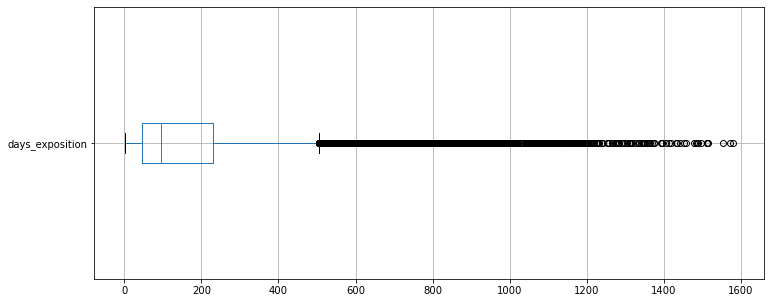

In [102]:
data.boxplot(column='days_exposition', figsize=(12, 5), vert=False);

Значения выше примерно 550 дней (1,5 года) за пределами "уса" графика - эти квартиры слишком долго продавались или еще не были проданы. Логично предположить, что если квартиру не смогли продать быстро, значит что-то с этой квартирой не так и скорее всего это связано с ценой. Нам такие квартиры не помогут для дальнейшего анализа данных. Удалим их.

In [103]:
data = data.loc[(data['days_exposition'] <= 550) | (data['days_exposition'].isna())]
data.shape[0]

21804

Остальные столбцы были рассмотрены ранее, аномальных значений больше не выявлено.

####  Вывод по предобработке данных 
Все данные были проанализированы. Найдены и устранены, где это возможно, пропуски. Изменены некорректные типы данных, также изменены типы для целых значений на int86 что уменьшило общий размер файла. Удалены неявные дубликаты в столбце с названием населенных пунктов. И устранены аномальные и редкие значения. Данные полностью готовы для анализа и дальнейших вычислений.

In [104]:
# Показатели о кол-ве объявлений в датасете, минимальных, средних, медианных и максимальных показателях 
# в выбранных параметрах о продаже квартир
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',\
          'kitchen_area', 'floor', 'floors_total']]
    .apply (['count', 'min', 'mean', 'median', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,804.00","21,804.00","13,262.00","18,713.00","21,804.00","20,017.00","19,664.00","21,804.00","21,804.00"
min,1.00,12.00,2.40,1.00,"430,000.00",8.00,5.00,1.00,1.00
mean,2.03,57.78,2.72,132.19,"5,742,319.87",33.07,10.29,5.91,10.73
median,2.00,51.09,2.65,86.00,"4,599,500.00",30.00,9.00,4.00,9.00
max,7.00,297.50,5.80,550.00,"36,000,000.00",211.00,60.00,27.00,28.00


### Посчитайте и добавьте в таблицу новые столбцы
#### Цена за 1 кв.м.
Добавим в столбец 'price1' цену одного квадратного метра. Поделим цену квартиры на количество метров.

In [105]:
data['price1'] = data['last_price'] / data['total_area']
data['price1'].head(20)

0    120,370.37
1     82,920.79
4    100,000.00
5     95,065.79
6     99,195.71
7    110,544.69
8     87,454.76
9     88,524.59
10   127,525.25
11    75,000.00
12    72,037.04
13    82,943.93
14   122,222.22
15   119,230.77
16    81,707.32
18   104,838.71
19   117,355.37
20    76,500.00
21   101,265.82
22    86,206.90
Name: price1, dtype: float64

#### День недели публикации объявления
Добавим в столбец "weekday" номер дня недели публикации объявления: 0 — понедельник, 1 — вторник и.т.д.

In [106]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['weekday'].head(20)

0     3
1     1
4     1
5     0
6     3
7     3
8     2
9     6
10    3
11    0
12    3
13    5
14    3
15    5
16    3
18    4
19    2
20    3
21    2
22    0
Name: weekday, dtype: int64

#### Месяц публикации объявления
Добавим в столбец "month" номер месяца публикации объявления.

In [107]:
data['month'] = data['first_day_exposition'].dt.month
data['month'].head(20)

0      3
1     12
4      6
5      9
6     11
7      4
8      5
9      2
10    11
11     8
12     6
13     7
14     6
15    11
16    11
18     1
19     1
20     9
21     3
22     4
Name: month, dtype: int64

####  Год публикации объявления
Добавим в столбец "year" год публикации объявления.

In [108]:
data['year'] = data['first_day_exposition'].dt.year
data['year'].head(20)

0     2019
1     2018
4     2018
5     2018
6     2017
7     2019
8     2018
9     2017
10    2017
11    2018
12    2016
13    2017
14    2016
15    2017
16    2017
18    2017
19    2019
20    2017
21    2018
22    2017
Name: year, dtype: int64

#### Тип квартиры
Добавим столбец 'type' с типом этажа квартиры (значения — «первый», «последний», «другой»).

In [109]:
def type_floor(row):
    try:
        if row['floor'] == 1:
            return 'Первый'
        elif row['floor'] == row['floors_total']:
            return 'Последний'
        elif row['floor'] <= 0:
            return 'ошибка'
        return 'Другой'
    except:
        pass

# Создадим столбец с типом этажа, применив функцию   
data['type'] = data[['floor', 'floors_total']].apply(type_floor, axis=1)

# Проверим столбец
data['type'].head(20)

0        Другой
1        Первый
4        Другой
5        Другой
6        Другой
7        Другой
8        Другой
9        Другой
10       Другой
11       Другой
12    Последний
13    Последний
14       Первый
15       Другой
16       Первый
18       Другой
19       Другой
20       Другой
21       Другой
22       Другой
Name: type, dtype: object

#### Расстояние до центра в км
Добавим в столбец "city_centers_km" расстояние до центра города в километрах, округлив до целого.

In [110]:
data['city_centers_km'] = round(data['city_centers_nearest'] / 1000)
data['city_centers_km'].head(20)

0    16.00
1    19.00
4     8.00
5      NaN
6    19.00
7    12.00
8      NaN
9    15.00
10   14.00
11   52.00
12     NaN
13   33.00
14   31.00
15   14.00
16   11.00
18   11.00
19   13.00
20   19.00
21   10.00
22     NaN
Name: city_centers_km, dtype: float64

In [111]:
# Проверим общую информацию об обновленном датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21804 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21804 non-null  int8          
 1   last_price            21804 non-null  float64       
 2   total_area            21804 non-null  float64       
 3   first_day_exposition  21804 non-null  datetime64[ns]
 4   rooms                 21804 non-null  int8          
 5   ceiling_height        13262 non-null  float64       
 6   floors_total          21804 non-null  int8          
 7   living_area           20017 non-null  float64       
 8   floor                 21804 non-null  int8          
 9   is_apartment          21804 non-null  bool          
 10  studio                21804 non-null  bool          
 11  open_plan             21804 non-null  bool          
 12  kitchen_area          19664 non-null  float64       
 13  balcony         

#### Вывод
В таблицу добавлены 6 новых столбцов на основе различных вычислений и методов:
- цена одного квадратного метра
- день недели публикации объявления
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры
- расстояние до центра города в километрах

При исследовательском анализе данных эти столбцы пригодятся.

### Проведите исследовательский анализ данных

Начнем исследовательский анализ данных, чтобы найти взаимосвязи и зависимости друг от друга, а также корреляцию различных параметров на цену квартиры.

#### Общая площадь квартиры

In [112]:
print(f'Максимальная площадь квартиры: {data["total_area"].max()}')
print(f'Минимальная площадь квартиры: {data["total_area"].min()}')
print(data['total_area'].value_counts())

Максимальная площадь квартиры: 297.5
Минимальная площадь квартиры: 12.0
45.00     400
42.00     357
44.00     329
31.00     327
60.00     315
         ... 
140.90      1
40.24       1
96.74       1
178.50      1
133.81      1
Name: total_area, Length: 1962, dtype: int64


In [113]:
data['total_area'].describe()

count   21,804.00
mean        57.78
std         27.07
min         12.00
25%         40.00
50%         51.09
75%         68.00
max        297.50
Name: total_area, dtype: float64

Средняя площадь у всех квартир - 57 кв.метров, медиана - 51 кв.метров. Большая часть всех квартир - от 40 до 68 кв.метров. Это совпадает с реальностью.

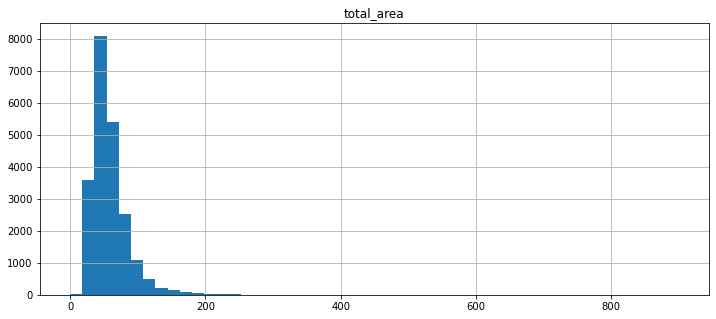

In [114]:
# Посторим гистограмму для наглядности
data.hist('total_area', bins=50, range = (0, 900), figsize=(12, 5));

Пик как раз показывает площади квартир в районе 50 кв.метров. Гистограмма показывает нормальное распределение по размеру площади. Количество больших квартир уменьшается с увеличением общей площади.

#### Жилая площадь

In [115]:
print(f'Максимальная жилая площадь квартиры: {data["living_area"].max()}')
print(f'Минимальная жилая площадь квартиры: {data["living_area"].min()}')

Максимальная жилая площадь квартиры: 211.0
Минимальная жилая площадь квартиры: 8.0


count   20,017.00
mean        33.07
std         17.83
min          8.00
25%         18.50
50%         30.00
75%         41.90
max        211.00
Name: living_area, dtype: float64


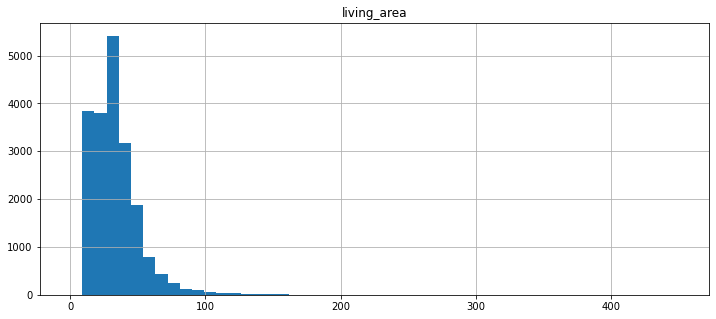

In [116]:
print(data['living_area'].describe())
data.hist('living_area', bins=50, range = (0, 450), figsize=(12, 5));

Жилая площадь аналогична общей площади. Имеем нормальное распределение. Медианное значение - 30 кв.метров, максимальное количество квартир имеют от 18 до 42 кв.метров жилой площади.

#### Площадь кухни

In [117]:
print(f'Максимальная площадь кухни: {data["kitchen_area"].max()}')
print(f'Минимальная площадь кухни: {data["kitchen_area"].min()}')

Максимальная площадь кухни: 60.0
Минимальная площадь кухни: 5.0


count   19,664.00
mean        10.29
std          5.01
min          5.00
25%          7.00
50%          9.00
75%         11.80
max         60.00
Name: kitchen_area, dtype: float64


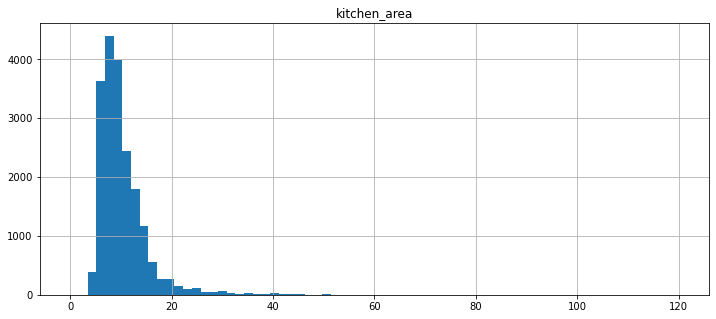

In [118]:
print(data['kitchen_area'].describe())
data.hist('kitchen_area', bins=70, range = (0, 120), figsize=(12, 5));

Площадь кухни аналогична общей и жилой площади. Имеем нормальное распределение. Медианное значение - 9 кв.метров, максимальное количество квартир имеют кухню от 5 до 11,8 кв.метров.

#### Цена квартиры

In [119]:
print(f'Максимальная цена квартиры: {data["last_price"].max()}')
print(f'Минимальная цена квартиры: {data["last_price"].min()}')
print(f'Средняя цена квартиры: {data["last_price"].mean()}')
print(f'Медианная цена квартиры: {data["last_price"].median()}')

Максимальная цена квартиры: 36000000.0
Минимальная цена квартиры: 430000.0
Средняя цена квартиры: 5742319.872775638
Медианная цена квартиры: 4599500.0


count       21,804.00
mean     5,742,319.87
std      4,194,647.09
min        430,000.00
25%      3,400,000.00
50%      4,599,500.00
75%      6,596,500.00
max     36,000,000.00
Name: last_price, dtype: float64


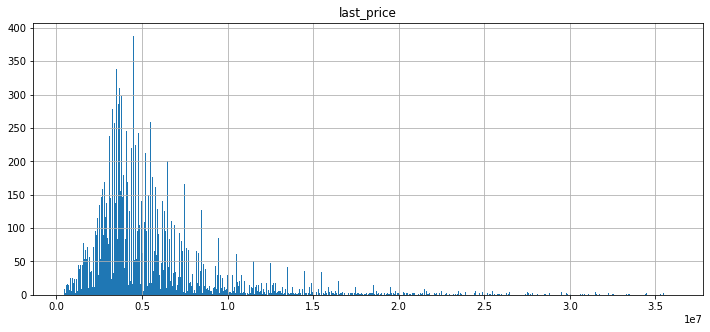

In [120]:
print(data['last_price'].describe())
data.hist('last_price', bins=1000, figsize=(12, 5));

Цены на квартиры сильно отличаются, но большая часть квартир стоит от 3,4 млн. до 6,6 млн.

#### Количество комнат

In [121]:
data['rooms'].sort_values().unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int8)

count   21,804.00
mean         2.03
std          0.99
min          1.00
25%          1.00
50%          2.00
75%          3.00
max          7.00
Name: rooms, dtype: float64


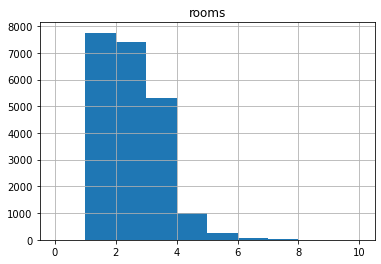

In [122]:
print(data['rooms'].describe())
data.hist('rooms', range=(0, 10));

У "стандартных" квартир комнат от 1 до 3. И только у 25% (1345) квартир комнат больше 3-х.

In [123]:
data[data['rooms'] > 3]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price1,weekday,month,year,type,city_centers_km
26,6,"4,050,000.00",60.00,2017-04-28,4,NaN,5,43.00,4,False,...,NaN,1,95.00,265.00,"67,500.00",4,4,2017,Другой,11.00
33,8,"4,800,000.00",73.00,2018-10-15,4,NaN,9,51.60,5,False,...,NaN,0,NaN,92.00,"65,753.42",0,10,2018,Другой,32.00
52,20,"11,795,000.00",136.00,2017-09-22,6,3.00,2,94.00,2,False,...,526.00,0,NaN,NaN,"86,727.94",4,9,2017,Последний,7.00
97,15,"4,898,000.00",146.00,2019-02-12,4,NaN,2,77.00,2,False,...,NaN,0,NaN,34.00,"33,547.95",1,2,2019,Последний,NaN
99,32,"9,600,000.00",90.00,2017-09-26,4,NaN,5,67.00,2,False,...,NaN,0,NaN,104.00,"106,666.67",1,9,2017,Другой,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23616,11,"7,400,000.00",74.70,2018-12-17,4,NaN,9,54.80,6,False,...,NaN,0,NaN,77.00,"99,062.92",0,12,2018,Другой,12.00
23622,15,"7,490,000.00",114.00,2018-08-13,4,3.15,4,81.30,4,False,...,NaN,0,NaN,245.00,"65,701.75",0,8,2018,Последний,NaN
23663,12,"6,400,000.00",88.00,2018-01-12,4,2.55,10,NaN,1,False,...,NaN,2,844.00,59.00,"72,727.27",4,1,2018,Первый,14.00
23683,16,"2,100,000.00",62.80,2018-09-18,4,2.50,5,45.50,3,False,...,NaN,0,NaN,NaN,"33,439.49",1,9,2018,Другой,NaN


#### Высота потолков

В этом столбце мы ранее "чистили" данные, высота потолков от 2,4 до 4,8 метров. Средняя высота - 2.7 метра. Большинство квартир имеют высоту потолков ниже 3-х метров.

In [124]:
data['ceiling_height'].describe()

count   13,262.00
mean         2.72
std          0.26
min          2.40
25%          2.50
50%          2.65
75%          2.80
max          5.80
Name: ceiling_height, dtype: float64

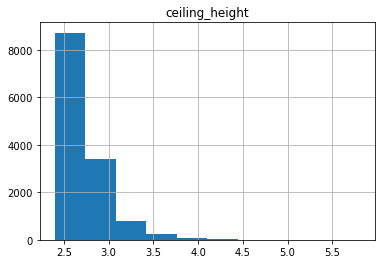

In [125]:
data.hist('ceiling_height');

#### Этаж квартиры

In [126]:
# Выводим уникальные значения
data['floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27], dtype=int8)

In [127]:
# Считаем, какие этажи самые популярные 
data['floor'].value_counts()

2     3091
3     2812
1     2675
4     2564
5     2407
6     1193
7     1114
8     1005
9      990
10     634
11     491
12     489
13     349
15     324
14     313
16     301
17     209
18     162
19     140
21     114
22     104
20     103
23      94
24      58
25      38
26      22
27       8
Name: floor, dtype: int64

In [128]:
data['floor'].describe()

count   21,804.00
mean         5.91
std          4.88
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         27.00
Name: floor, dtype: float64

Самые продаваемые квартиры с 1 по 9 этажи. Это можно объяснить тем, что большинство старых домов имеют всего 9 этажей. В высоких домах на верхних этажах реже продают квартиры, в нашем датасете квартир выше 17 этажа 843 штуки, на 27-м этаже всего 8 штук.

In [129]:
data[data['floor'] > 17]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price1,weekday,month,year,type,city_centers_km
7,5,"7,915,000.00",71.60,2019-04-18,2,NaN,24,NaN,22,False,...,NaN,0,NaN,NaN,"110,544.69",3,4,2019,Другой,12.00
8,20,"2,900,000.00",33.16,2018-05-23,1,NaN,27,15.43,26,False,...,NaN,0,NaN,189.00,"87,454.76",2,5,2018,Другой,NaN
25,3,"6,800,000.00",76.00,2015-10-01,2,2.75,23,39.00,18,False,...,NaN,1,564.00,300.00,"89,473.68",3,10,2015,Другой,15.00
40,9,"3,590,000.00",36.00,2017-03-15,1,2.60,26,15.00,22,False,...,NaN,0,NaN,430.00,"99,722.22",2,3,2017,Другой,19.00
75,19,"4,950,000.00",44.00,2018-02-27,2,2.70,23,21.00,19,False,...,NaN,0,NaN,36.00,"112,500.00",1,2,2018,Другой,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23463,10,"3,800,000.00",40.70,2017-07-21,1,2.57,27,15.00,18,False,...,NaN,0,NaN,30.00,"93,366.09",4,7,2017,Другой,19.00
23476,0,"11,000,000.00",75.70,2018-11-14,2,2.70,23,33.90,21,False,...,NaN,0,NaN,13.00,"145,310.44",2,11,2018,Другой,14.00
23504,20,"4,800,000.00",42.50,2017-04-18,1,2.80,26,15.60,21,False,...,NaN,1,400.00,128.00,"112,941.18",1,4,2017,Другой,22.00
23549,5,"19,600,000.00",184.00,2016-04-21,3,3.00,19,55.70,19,False,...,NaN,0,NaN,205.00,"106,521.74",3,4,2016,Последний,5.00


In [130]:
data[data['floor'] == 27]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price1,weekday,month,year,type,city_centers_km
113,8,"5,750,000.00",78.00,2016-05-19,3,NaN,27,45.40,27,False,...,NaN,0,NaN,426.00,"73,717.95",3,5,2016,Последний,19.00
2629,20,"3,150,021.00",36.61,2018-02-20,1,2.55,27,17.71,27,False,...,NaN,0,NaN,176.00,"86,042.64",1,2,2018,Последний,NaN
4091,4,"3,900,000.00",37.00,2017-12-06,1,NaN,27,13.00,27,False,...,NaN,0,NaN,35.00,"105,405.41",2,12,2017,Последний,19.00
6157,9,"2,990,000.00",33.30,2017-07-19,1,NaN,27,15.30,27,False,...,NaN,0,NaN,383.00,"89,789.79",2,7,2017,Последний,NaN
7711,12,"4,799,000.00",60.00,2017-04-18,2,2.50,28,31.00,27,False,...,NaN,0,NaN,87.00,"79,983.33",1,4,2017,Другой,20.00
13276,0,"4,450,000.00",38.00,2017-12-10,1,NaN,27,NaN,27,False,...,NaN,0,NaN,76.00,"117,105.26",6,12,2017,Последний,19.00
16644,2,"4,538,000.00",57.37,2018-02-28,2,NaN,27,33.60,27,False,...,NaN,0,NaN,258.00,"79,100.58",2,2,2018,Последний,NaN
23292,6,"2,980,000.00",36.02,2018-07-26,1,2.65,27,NaN,27,False,...,NaN,0,NaN,72.00,"82,731.82",3,7,2018,Последний,NaN


#### Тип этажа квартиры

In [131]:
# Посчитаем количество по типам этажей
data['type'].value_counts()

Другой       16041
Последний     3088
Первый        2675
Name: type, dtype: int64

In [132]:
print(f'Доля этажа типа Другой: {16041 / data.shape[0]:.1%}')
print(f'Доля последнего этажа: {3088 / data.shape[0]:.1%}')
print(f'Доля первого этажа: {2675 / data.shape[0]:.1%}')

Доля этажа типа Другой: 73.6%
Доля последнего этажа: 14.2%
Доля первого этажа: 12.3%


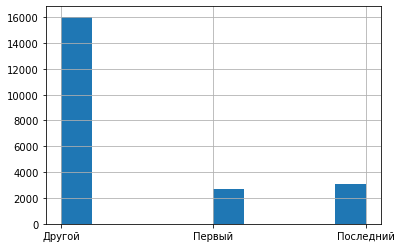

In [133]:
data['type'].hist();

Больше всего продаются квартиры не первого и не последнего этажа, они составляют 73,6% от всех квартир.

#### Количество этажей в доме

In [134]:
print(data['floors_total'].value_counts())
data['floors_total'].max()

5     5329
9     3546
16    1297
12    1291
4     1081
10    1079
25    1013
6      789
17     786
3      605
14     526
7      512
18     480
24     436
15     347
2      345
23     327
19     321
8      319
22     266
20     250
13     212
11     178
27     159
21     146
26     118
1       26
28      20
Name: floors_total, dtype: int64


28

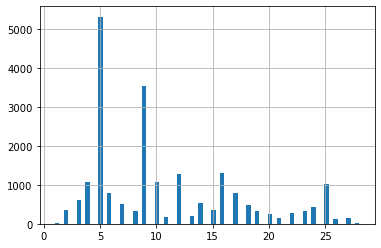

In [135]:
data['floors_total'].hist(bins=70);

Больше всего квартир продается в 5-ти этажных домах, затем 9-ти этажных.

#### Расстояние до центра города в метрах

In [136]:
print(f'Максимальное расстояние до центра города: {data["city_centers_nearest"].max()}')
print(f'Минимальное расстояние до центра города: {data["city_centers_nearest"].min()}')

Максимальное расстояние до центра города: 65952.0
Минимальное расстояние до центра города: 181.0


In [137]:
data['city_centers_nearest'].describe()

count   16,638.00
mean    14,401.11
std      8,484.35
min        181.00
25%      9,734.00
50%     13,251.00
75%     16,378.00
max     65,952.00
Name: city_centers_nearest, dtype: float64

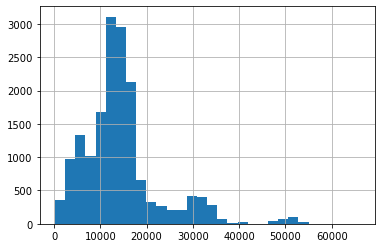

In [138]:
data['city_centers_nearest'].hist(bins=30);

Протяжённость Санкт-Петербурга в административных границах: с севера на юг в пределах КАД — 32 км (за пределами КАД — 52 км), с северо-запада на юго-восток за пределами КАД,— около 90 км.

Медианное значение расстояния до центра - 13 км, третьего квартиля - 16.4 км. Это укладывается в радиус СПб до КАДа. Посмотрим, сколько квартир продается более чем 17 км от центра - 3556.

In [139]:
data[data['city_centers_nearest'] > 17000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price1,weekday,month,year,type,city_centers_km
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11,18.60,1,False,...,NaN,0,NaN,81.00,"82,920.79",1,12,2018,Первый,19.00
6,6,"3,700,000.00",37.30,2017-11-02,1,NaN,26,10.60,6,False,...,NaN,0,NaN,155.00,"99,195.71",3,11,2017,Другой,19.00
11,9,"3,300,000.00",44.00,2018-08-27,2,NaN,5,31.00,4,False,...,NaN,0,NaN,7.00,"75,000.00",0,8,2018,Другой,52.00
13,20,"3,550,000.00",42.80,2017-07-01,2,2.56,5,27.00,5,False,...,294.00,3,298.00,366.00,"82,943.93",5,7,2017,Последний,33.00
14,1,"4,400,000.00",36.00,2016-06-23,1,NaN,6,17.00,1,False,...,NaN,1,96.00,203.00,"122,222.22",3,6,2016,Первый,31.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23660,1,"2,950,000.00",53.60,2018-02-01,2,2.75,3,32.00,3,False,...,NaN,0,NaN,35.00,"55,037.31",3,2,2018,Последний,42.00
23667,14,"9,990,000.00",90.00,2017-01-23,3,3.06,17,55.00,9,False,...,NaN,1,545.00,86.00,"111,000.00",0,1,2017,Другой,33.00
23669,8,"3,000,000.00",34.10,2017-11-10,1,NaN,9,17.00,3,False,...,NaN,1,741.00,74.00,"87,976.54",4,11,2017,Другой,30.00
23685,15,"2,490,000.00",31.00,2019-01-24,1,2.50,5,17.30,5,False,...,NaN,0,NaN,NaN,"80,322.58",3,1,2019,Последний,52.00


In [140]:
# А теперь в СПб и более 17 км от центра
spb = data[data['locality_name'] == 'Санкт-Петербург']
spb[spb['city_centers_nearest'] > 17000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price1,weekday,month,year,type,city_centers_km
116,18,"10,999,000.00",97.20,2017-11-13,3,2.50,16,NaN,16,False,...,NaN,2,390.00,394.00,"113,158.44",0,11,2017,Последний,21.00
125,20,"4,800,000.00",65.90,2018-02-25,3,2.55,9,48.50,8,False,...,NaN,0,NaN,239.00,"72,837.63",6,2,2018,Другой,17.00
162,2,"5,600,000.00",66.00,2018-07-11,3,2.50,9,48.00,9,False,...,762.00,0,NaN,NaN,"84,848.48",2,7,2018,Последний,17.00
167,11,"3,750,000.00",35.10,2019-04-08,1,2.75,23,15.90,1,False,...,NaN,1,68.00,NaN,"106,837.61",0,4,2019,Первый,18.00
195,8,"5,300,000.00",60.00,2016-05-19,3,NaN,9,NaN,4,False,...,"1,133.00",3,239.00,372.00,"88,333.33",3,5,2016,Другой,17.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23520,7,"3,800,000.00",44.00,2018-02-21,2,2.50,5,28.00,4,False,...,515.00,0,NaN,14.00,"86,363.64",2,2,2018,Другой,17.00
23532,7,"8,200,000.00",74.30,2019-03-13,2,NaN,24,36.00,11,False,...,NaN,1,400.00,NaN,"110,363.39",2,3,2019,Другой,22.00
23554,15,"3,350,000.00",26.00,2018-09-07,1,NaN,19,NaN,8,False,...,NaN,2,112.00,31.00,"128,846.15",4,9,2018,Другой,17.00
23566,6,"11,703,000.00",126.50,2017-06-15,3,NaN,6,60.90,4,False,...,NaN,2,287.00,244.00,"92,513.83",3,6,2017,Другой,18.00


Нужно уточнить в тех.отделе, до какого центра города считается расстояние. В ЛО есть города в составе города СПб, например Колпино. Непонятно, до какого центра города производится расчет. Если квартира расположена в деревне - расстояние до районного центра или до ближайшего города? В нашем датасете максимальное расстояние до центра города - 66 км.

#### Расстояние до аэропорта

In [141]:
data['airports_nearest'].describe()

count   16,618.00
mean    28,911.65
std     12,755.97
min          0.00
25%     18,446.00
50%     26,974.50
75%     37,434.00
max     84,853.00
Name: airports_nearest, dtype: float64

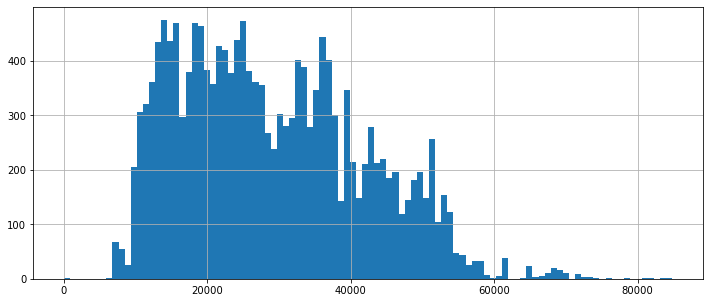

In [142]:
data['airports_nearest'].hist(bins=100, figsize=(12, 5));

In [143]:
data[data['airports_nearest'] < 10000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price1,weekday,month,year,type,city_centers_km
211,12,"8,000,000.00",54.00,2019-03-26,2,2.77,18,31.00,10,False,...,NaN,0,NaN,11.00,"148,148.15",1,3,2019,Другой,14.00
212,0,"10,018,000.00",82.00,2015-01-29,3,NaN,23,47.00,9,False,...,980.00,1,"1,093.00",543.00,"122,170.73",3,1,2015,Другой,13.00
242,19,"7,250,000.00",57.00,2018-12-13,2,NaN,6,29.00,5,False,...,546.00,0,NaN,18.00,"127,192.98",3,12,2018,Другой,13.00
244,9,"6,850,000.00",57.10,2016-02-04,2,NaN,9,29.50,4,False,...,466.00,0,NaN,356.00,"119,964.97",3,2,2016,Другой,10.00
245,6,"6,000,000.00",46.40,2016-02-19,1,2.50,16,18.00,5,False,...,NaN,0,NaN,120.00,"129,310.34",4,2,2016,Другой,13.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23432,9,"3,900,000.00",36.00,2017-07-07,1,NaN,25,15.70,19,False,...,842.00,0,NaN,52.00,"108,333.33",4,7,2017,Другой,13.00
23476,0,"11,000,000.00",75.70,2018-11-14,2,2.70,23,33.90,21,False,...,NaN,0,NaN,13.00,"145,310.44",2,11,2018,Другой,14.00
23520,7,"3,800,000.00",44.00,2018-02-21,2,2.50,5,28.00,4,False,...,515.00,0,NaN,14.00,"86,363.64",2,2,2018,Другой,17.00
23557,6,"3,800,000.00",29.00,2019-03-16,1,2.60,7,17.00,4,False,...,355.00,1,902.00,11.00,"131,034.48",5,3,2019,Другой,11.00


Основная масса квартир находится на расстоянии дальше 18 км от аэропорта. Менее 10 км - всего 288 квартиры. Медианное значение - 27 км. Есть квартиры, расположенные очень далеко от аэропорта, вплоть до 85 км.

#### Расстояние до ближайшего парка

In [144]:
data['parks_nearest'].describe()

count   7,294.00
mean      491.31
std       339.05
min         1.00
25%       288.00
50%       456.00
75%       612.00
max     3,190.00
Name: parks_nearest, dtype: float64

Из тех квартир, в которых указали наличие в радиусе 3-х км парка, большинство парков расположены менее чем в 600 метрах. Есть значения совсем маленькие, вплоть до 1 метра. Хозяева, скорее всего, таким образом хотели привлечь внимание покупателей, что парк действительно расположен очень близко от дома. Менее 20 метров до парка указали в 54 квартирах. Логически можно предположить, что хотя бы метров 20 нужно заложить на расстояние от дома до парка (дорога, парковка, придомовое расстояние). Не будем учитывать такие квартиры для построения гистограммы.

In [145]:
data[data['parks_nearest'] < 20]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price1,weekday,month,year,type,city_centers_km
126,10,"4,050,000.00",51.00,2019-04-23,2,NaN,5,30.50,1,False,...,15.00,1,659.00,NaN,"79,411.76",1,4,2019,Первый,33.00
189,0,"6,150,000.00",62.00,2017-10-13,3,NaN,9,41.50,5,False,...,10.00,0,NaN,45.00,"99,193.55",4,10,2017,Другой,12.00
214,5,"4,150,000.00",50.41,2017-07-20,2,2.50,9,31.10,8,False,...,10.00,0,NaN,274.00,"82,324.94",3,7,2017,Другой,12.00
455,20,"8,500,000.00",65.00,2019-04-24,3,2.55,7,43.00,2,False,...,15.00,3,293.00,NaN,"130,769.23",2,4,2019,Другой,8.00
540,4,"7,500,000.00",78.00,2017-02-21,3,3.20,5,47.80,3,False,...,19.00,1,58.00,78.00,"96,153.85",1,2,2017,Другой,14.00
706,19,"8,680,000.00",63.00,2019-03-02,2,NaN,20,32.00,2,False,...,13.00,0,NaN,57.00,"137,777.78",5,3,2019,Другой,9.00
1208,16,"3,650,000.00",31.30,2019-04-29,1,2.50,9,15.80,7,False,...,19.00,0,NaN,NaN,"116,613.42",0,4,2019,Другой,14.00
1214,9,"3,950,000.00",45.60,2016-10-05,2,NaN,9,28.20,8,False,...,11.00,0,NaN,211.00,"86,622.81",2,10,2016,Другой,12.00
1456,0,"3,800,000.00",42.10,2018-09-21,3,2.50,5,30.00,3,False,...,16.00,1,748.00,56.00,"90,261.28",4,9,2018,Другой,12.00
1896,0,"5,000,000.00",59.20,2019-04-08,2,NaN,4,36.00,3,False,...,16.00,2,99.00,NaN,"84,459.46",0,4,2019,Другой,50.00


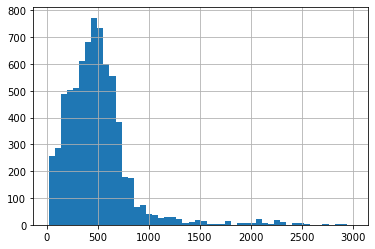

In [146]:
data['parks_nearest'].hist(bins=50, range=(20, 3000));

Гистограмма наглядно показывает кучность квартир в 200-600 метрах от парка. 

#### Дата публикации объявления

In [147]:
print(data['first_day_exposition'].max())
print(data['first_day_exposition'].min())

2019-05-03 00:00:00
2014-11-27 00:00:00


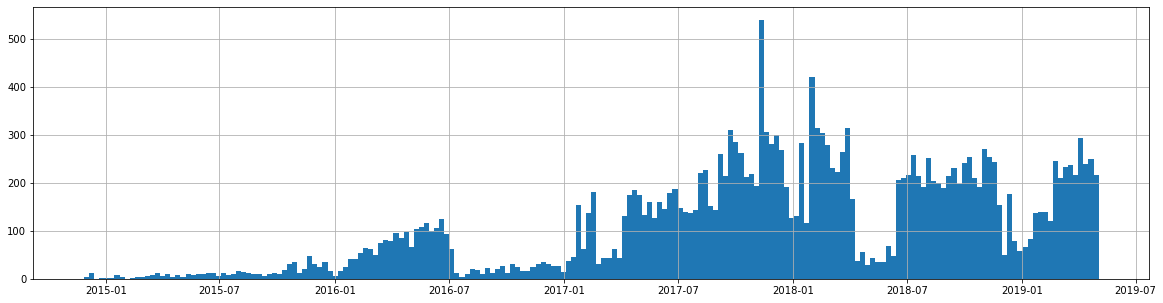

In [148]:
data['first_day_exposition'].hist(bins=200, figsize=(20, 5));

В 2015 году объявлений было значительно меньше, чем в остальные года. Начиная с начала 2017 года пошел заметный рост в публикациях. Два пика пришлись на конец 2017 и начало 2018 годов. Теперь рассмотрим публикации по дням недели и месяцам.

3    3901
1    3844
4    3731
2    3648
0    3321
5    1790
6    1569
Name: weekday, dtype: int64


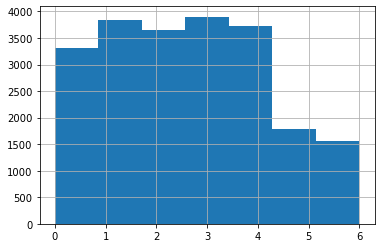

In [149]:
print(data['weekday'].value_counts())
data['weekday'].hist(bins=7);

В выходные объявления размещали значительно меньше, чем в будни. Самые пиковый день - четверг.

2     2459
3     2352
11    2221
4     2214
10    1995
9     1838
8     1630
6     1589
7     1560
12    1444
1     1368
5     1134
Name: month, dtype: int64


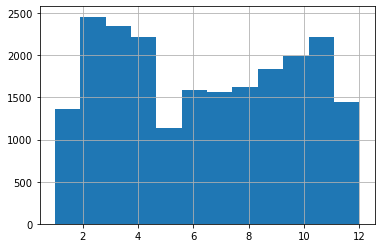

In [150]:
print(data['month'].value_counts())
data['month'].hist(bins=12);

Если смотреть публикации по месяцам, то самые активные месяцы - февраль, март и ноябрь. Самые "тухлые" - май, январь и декабрь. Ближе к лету заметно понятное снижение публикаций из-за массовых отпусков.

#### Скорость продажи квартиры
Теперь рассчитаем скорость продажи квартиры, в течение какого времени в среднем продаются квартиры.

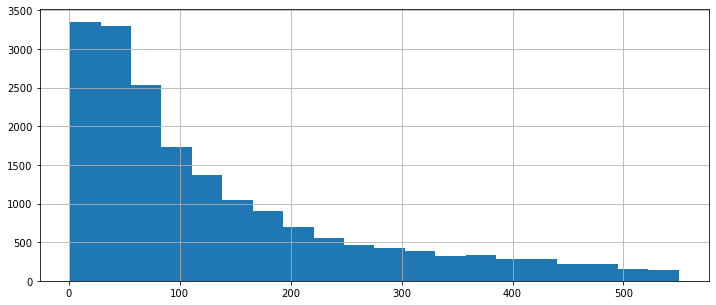

In [151]:
data['days_exposition'].hist(bins=20, figsize=(12, 5));

In [152]:
data['days_exposition'].describe()

count   18,713.00
mean       132.19
std        127.06
min          1.00
25%         42.00
50%         86.00
75%        186.00
max        550.00
Name: days_exposition, dtype: float64

Медианное значение продажи квартиры - 86 дней. Среднее значение - 132 дня. Есть квартира, которую продали за 1 день, есть за 1,5 года (и это мы исключили из датасета квартиры, которые продавались еще больше, вплоть до 4-х лет). 75% всех квартир были проданы за полгода.

In [153]:
# 4657 квартир были проданы менее чем за 42 дня
data[data['days_exposition'] < 42]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price1,weekday,month,year,type,city_centers_km
11,9,"3,300,000.00",44.00,2018-08-27,2,NaN,5,31.00,4,False,...,NaN,0,NaN,7.00,"75,000.00",0,8,2018,Другой,52.00
15,16,"4,650,000.00",39.00,2017-11-18,1,NaN,14,20.50,5,False,...,590.00,1,296.00,19.00,"119,230.77",5,11,2017,Другой,14.00
34,3,"3,290,000.00",33.00,2018-02-04,1,2.55,16,14.00,3,False,...,NaN,0,NaN,15.00,"99,696.97",6,2,2018,Другой,13.00
39,15,"5,200,000.00",54.40,2018-11-29,2,2.75,9,29.70,2,False,...,NaN,1,"1,175.00",29.00,"95,588.24",3,11,2018,Другой,12.00
53,7,"4,300,000.00",39.10,2017-11-10,1,NaN,25,15.40,13,False,...,NaN,0,NaN,6.00,"109,974.42",4,11,2017,Другой,19.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23682,11,"2,350,000.00",35.60,2016-06-23,1,2.50,5,17.00,4,False,...,NaN,0,NaN,40.00,"66,011.24",3,6,2016,Другой,NaN
23687,6,"3,200,000.00",39.00,2017-12-16,1,NaN,9,20.00,6,False,...,NaN,0,NaN,38.00,"82,051.28",5,12,2017,Другой,17.00
23688,19,"9,200,000.00",101.00,2019-04-01,3,3.05,15,63.00,12,False,...,NaN,0,NaN,23.00,"91,089.11",0,4,2019,Другой,14.00
23689,13,"3,550,000.00",35.30,2018-02-28,1,2.86,15,16.30,4,False,...,353.00,2,652.00,29.00,"100,566.57",2,2,2018,Другой,16.00


In [154]:
# 4697 квартиры были проданы более чем за 186 дней
data[data['days_exposition'] > 186]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price1,weekday,month,year,type,city_centers_km
8,20,"2,900,000.00",33.16,2018-05-23,1,NaN,27,15.43,26,False,...,NaN,0,NaN,189.00,"87,454.76",2,5,2018,Другой,NaN
9,18,"5,400,000.00",61.00,2017-02-26,3,2.50,9,43.60,7,False,...,NaN,0,NaN,289.00,"88,524.59",6,2,2017,Другой,15.00
13,20,"3,550,000.00",42.80,2017-07-01,2,2.56,5,27.00,5,False,...,294.00,3,298.00,366.00,"82,943.93",5,7,2017,Последний,33.00
14,1,"4,400,000.00",36.00,2016-06-23,1,NaN,6,17.00,1,False,...,NaN,1,96.00,203.00,"122,222.22",3,6,2016,Первый,31.00
16,11,"6,700,000.00",82.00,2017-11-23,3,3.05,5,55.60,1,False,...,420.00,0,NaN,397.00,"81,707.32",3,11,2017,Первый,11.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23666,9,"8,150,000.00",80.00,2016-04-17,3,NaN,17,44.90,12,False,...,NaN,0,NaN,286.00,"101,875.00",6,4,2016,Другой,NaN
23686,8,"3,300,000.00",31.00,2017-04-29,1,2.55,9,18.00,6,False,...,140.00,1,317.00,193.00,"106,451.61",5,4,2017,Другой,12.00
23691,11,"9,470,000.00",72.90,2016-10-13,2,2.75,25,40.30,7,False,...,NaN,1,806.00,519.00,"129,903.98",3,10,2016,Другой,4.00
23692,2,"1,350,000.00",30.00,2017-07-07,1,NaN,5,17.50,4,False,...,NaN,0,NaN,413.00,"45,000.00",4,7,2017,Другой,NaN


Продажи квартир более чем за 186 дней можно считать долгими, так как эти значения попали в верхний квартиль. Менее 42 дней - быстрыми (в нижнем квартиле).

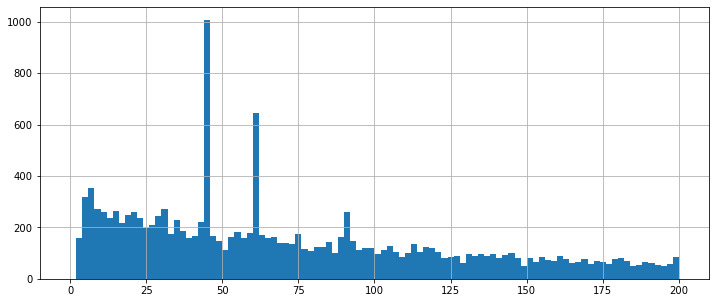

In [155]:
# рассмотрим детальнее
data['days_exposition'].hist(bins=100, figsize=(12, 5), range=(0,200));

На гистограмме продаж мы видим 3 пика. Это 45, 60 и 90 дней. Можем предположить, что это периоды платного/пробного размещения объявления. По истечении этого периода объявление автоматически снимается с публикации и засчитывается как продажа. Пользователь дальше решает, нужно ли ему продолжать публикацию объявления, если это еще актуально. Если объявление возобновляется - дни продолжают считаться с момента первой публикации.

#### Факторы, влияющие на общую стоимость квартиры

Построим график, отсортировав квартиры по общей площади.

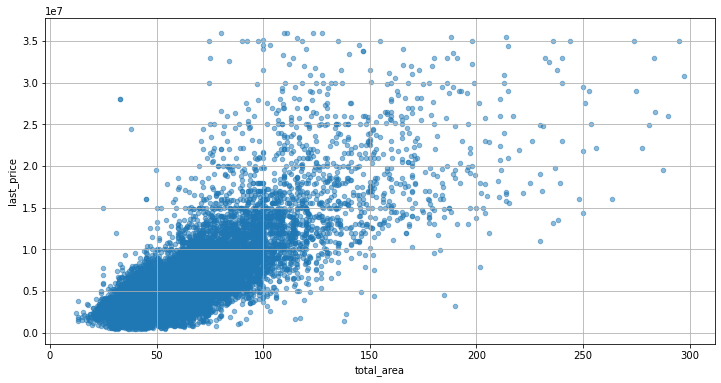

In [156]:
data.sort_values('total_area').plot(x='total_area', y='last_price', kind='scatter', \
                                    grid=True, figsize=(12, 6), alpha=0.5);

Корреляция общей площади и итоговой цены квартиры видна невооруженным глазом. Посчитаем коэффициент корреляции Пирсона: 0.79. С увеличением общей площади квартиры увеличивается стоимость квартиры.

In [157]:
data['total_area'].corr(data['last_price'])

0.7874674976214733

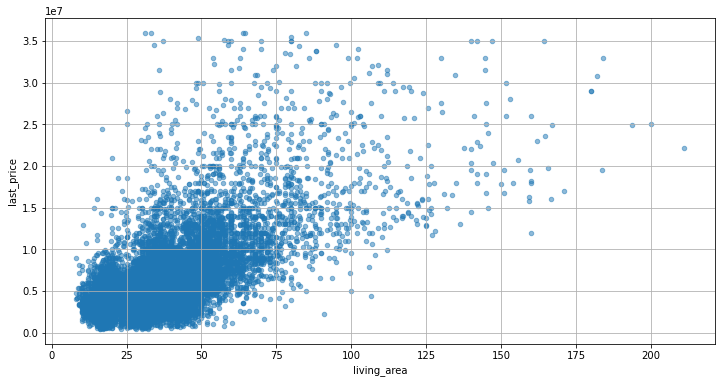

In [158]:
data.sort_values('living_area').plot(x='living_area', y='last_price', kind='scatter', \
                                     grid=True, figsize=(12, 6), alpha=0.5);

In [159]:
data['living_area'].corr(data['last_price'])

0.6822095950801774

Корреляция жилой площади относительно цены меньше (0,68), чем общей площади. Но она все равно положительно прослеживается.

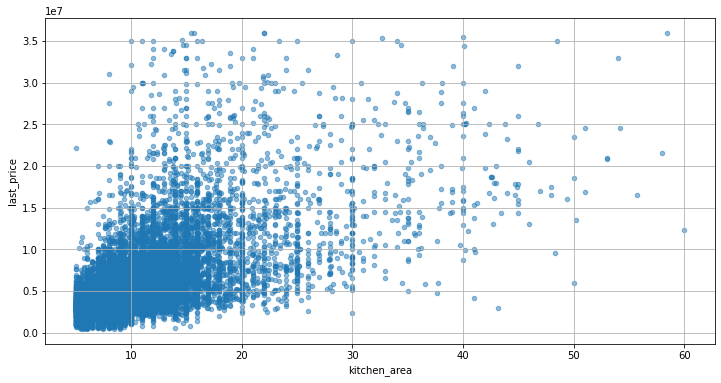

In [160]:
data.sort_values('kitchen_area').plot(x='kitchen_area', y='last_price', kind='scatter', \
                                      grid=True, figsize=(12, 6), alpha=0.5);

Видим небольшие скопления квартир в целочисленных значениях (скорее всего пользователи округляли площадь кухни, когда заполняли данные). Облако точек медленно смещается вверх вправо - имеет положительную динамику. Рассчитаем коэффициент Пирсона.

In [161]:
data['kitchen_area'].corr(data['last_price'])

0.6061060374593804

Он получился меньше чем у жилой и общей площади - 0,6.

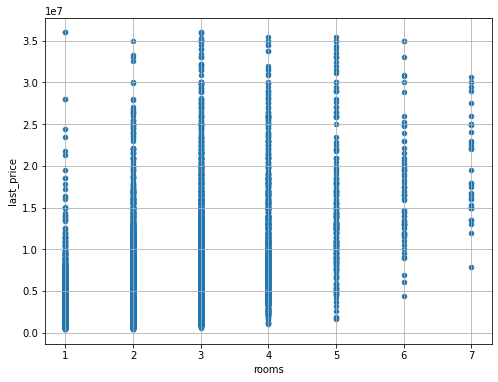

In [162]:
data.sort_values('rooms').plot(x='rooms', y='last_price', kind='scatter', grid=True, figsize=(8, 6));

In [163]:
data['rooms'].corr(data['last_price'])

0.5060862570285412

Связь между количеством комнат и общей ценой за квартиру не сильно большая. Квартиры с 2-мя, 3-мя и 4-мя комнатами могут стоить одинаково. Также есть однокомнатные квартиры, которые стоят как пяти-, шестикомнатные. Коэффициент корреляции Пирсона это доказывает - 0.5. 

In [164]:
data.groupby('type')['last_price'].mean()

type
Другой      5,984,216.87
Первый      4,536,716.45
Последний   5,530,117.63
Name: last_price, dtype: float64

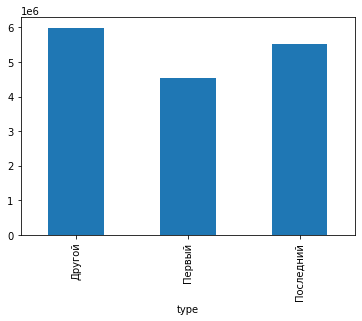

In [165]:
data.groupby(by='type')['last_price'].mean().plot(x='type', y='last_price', kind='bar');

Средняя цена квартир на первом этаже самая низкая, квартиры не на первом и не на последнем этаже дороже.

Построим график с датой размещения объявления и ценой квартиры. В 2015 году дорогих квартир было меньше, чем в 17-19 гг. В середине 16 года был спад на размещение объявлений, дорогих квартир практически не было.

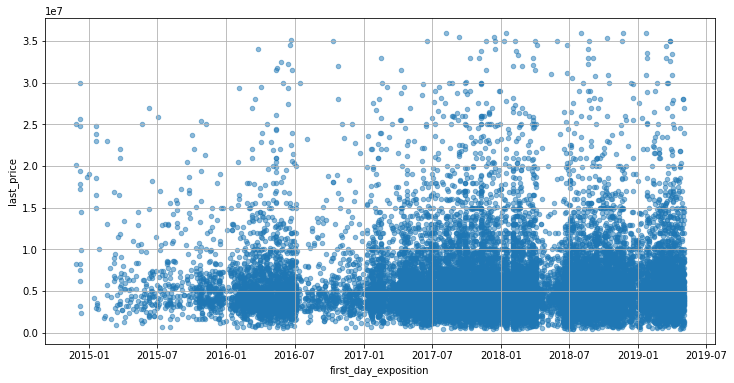

In [166]:
data.sort_values('first_day_exposition').plot(x='first_day_exposition', y='last_price', \
                                              kind='scatter', grid=True, figsize=(12, 6), alpha=0.5);

In [167]:
data.groupby('year')['last_price'].mean()

year
2014   15,210,235.29
2015    6,313,520.98
2016    5,759,394.59
2017    5,670,757.57
2018    5,616,294.06
2019    6,132,535.03
Name: last_price, dtype: float64

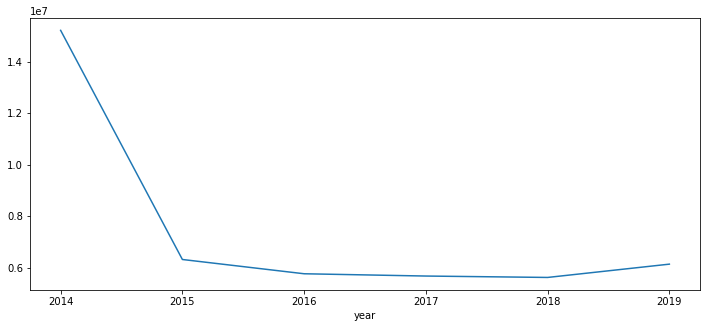

In [168]:
data.groupby('year')['last_price'].mean().plot(x='year', y='last_price', figsize=(12, 5));

К началу 2015 года средняя цена квартир резко уменьшилась и продолжила равномерно падать, в начале 2018 года цены снова начали повышаться.

In [169]:
data.groupby('month')['last_price'].mean()

month
1    5,769,388.25
2    5,770,753.94
3    5,794,474.13
4    5,805,624.43
5    5,675,217.92
6    5,515,930.10
7    5,788,104.44
8    5,773,105.18
9    5,816,359.97
10   5,604,014.90
11   5,836,283.55
12   5,656,163.62
Name: last_price, dtype: float64

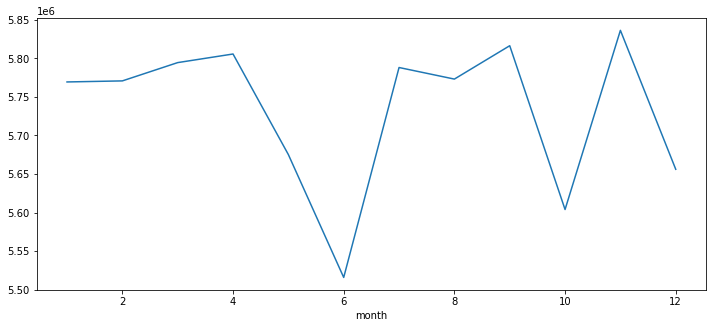

In [170]:
data.groupby('month')['last_price'].mean().plot(x='month', y='last_price', figsize=(12, 5));

В течение всего года средние цены на квартиры скачут в районе 200-350 тыс.рублей. В июне есть заметный спад, но в июле цены возвращаются. В октябре и перед Новым Годом опять фиксируется небольшой спад.

In [171]:
data.groupby('weekday')['last_price'].mean()

weekday
0   5,796,879.98
1   5,735,963.74
2   5,857,551.75
3   5,786,399.74
4   5,682,081.77
5   5,558,246.25
6   5,618,137.33
Name: last_price, dtype: float64

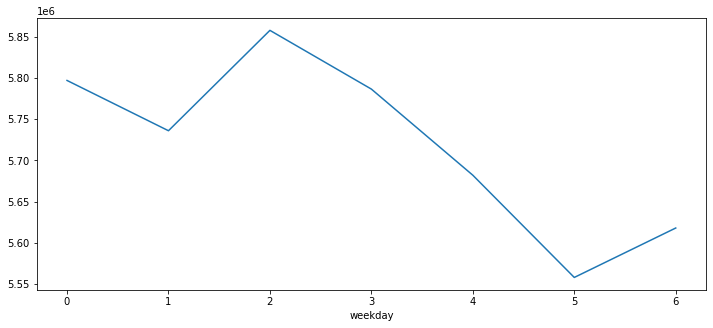

In [172]:
data.groupby('weekday')['last_price'].mean().plot(x='weekday', y='last_price', figsize=(12, 5));

Средняя цена квартир, размещенных в среду, выше. У квартир, добавленных в субботу и воскресенье, средняя цена ниже, чем у квартир, добавленных в другие дни.

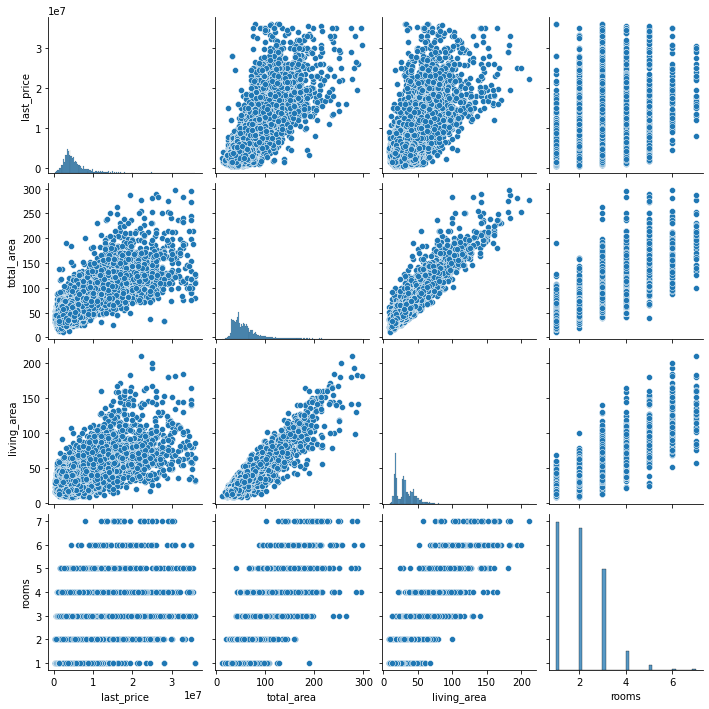

In [173]:
sns.pairplot(data[['last_price', 'total_area', 'living_area', 'rooms']]);

Самая большая зависимость стоимости квартиры - от общей площади квартиры. Затем от жилой площади и площади кухни. Количество комнат не сильно зависит на цену квартиру, так как многие квартиры имеют малое количество комнат, но их суммарная площадь большая. Также на цену зависит этаж квартиры. Первые этажи стоят дешевле, даже если площадь квартиры больше, чем у квартир этажем выше. На общую цену квартиры также зависит год продажи, месяц размещения и день недели.  

#### Средние цены за 1 кв.м.
Найдем 10 населенных пунктов, в которых больше всего было объявлений о продаже квартиры, и посчитаем среднюю цену за 1 кв.метр.

In [174]:
# группируем по населенному пункту, считаем среднее значение столбца price1, сортируем по убыванию 
# и выводим первые 10
data.groupby('locality_name')['price1']\
.agg({'count', 'mean'}).sort_values(by = 'count', ascending = False).head(10)\
.sort_values(by = 'mean', ascending = False)

,count,mean
locality_name,,
Санкт-Петербург,14375,"111,054.09"
Пушкин,335,"102,730.76"
деревня Кудрово,272,"92,602.35"
поселок Парголово,314,"89,904.34"
поселок Мурино,524,"85,694.34"
поселок Шушары,421,"78,502.04"
Колпино,324,"75,267.18"
Гатчина,282,"69,046.81"
Всеволожск,368,"68,719.40"


Самый дорогой квадратный метр из ТОП-10 (больше всего размещено объявлений) в Санкт-Петербурге - 114К, затем живописный и зеленый Пушкин, самый дешевый в Выборге - 58К.

#### Зависимость расстояния на цену кв.м.
Оценим, как стоимость квартир зависит от расстояния до центра города в Санкт-Петербурге.

In [175]:
# выберем все объявления из Санкт-Петербурга
spb_city = data['locality_name'] == 'Санкт-Петербург'
# составим сводную таблицу, сгруппировав по расстоянию от центра в км и добавив значения стоимости квартиры 
# и цену за 1 кв.м., посчитаем средние значения для цены 1 кв.м и общую цену квартиры.
mean_km = data.pivot_table(index='city_centers_km', values=['last_price', 'price1'], aggfunc='mean')
mean_km.head(10)

,last_price,price1
city_centers_km,,
0.00,"14,693,277.78","146,341.95"
1.00,"12,621,117.23","147,607.89"
2.00,"10,951,195.12","128,749.07"
3.00,"9,938,397.91","118,501.19"
4.00,"10,670,976.01","126,551.21"
5.00,"11,010,734.02","132,617.82"
6.00,"10,324,258.20","134,859.34"
7.00,"9,982,745.48","135,405.13"
8.00,"8,842,050.35","124,270.52"


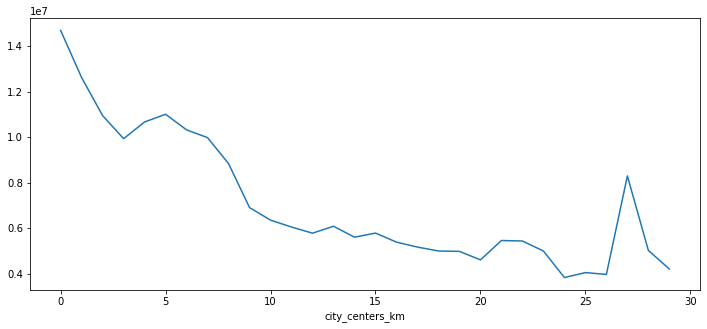

In [179]:
data[spb_city].groupby('city_centers_km')['last_price'].mean().plot(x='city_centers_km', \
                                                                    y='last_price', figsize=(12, 5));

Средняя цена квартир, расположенных в центре, дороже. Чем дальше от центра - тем средняя цена уменьшается. На окраинах СПб цена увеличивается, это скорее всего связано с постройкой новых элитных домов. 

#### Вывод
Проанализировали разные параметры квартиры и нашли взаимосвязи между значениями.

### Общий вывод

Стоимость объекта недвижимости зависит от многих факторов:
- самый важный параметр: общая площадь квартиры. Чем больше площадь, тем больше стоимость.
- также немаловажен этаж квартиры. Квартиры на первом этаже стоят дешевле, затем квартиры на последних этажах. Средняя цена квартир не первого и не последнего этажа дороже.
- квартиры, расположенные ближе к центру города (в Санкт-Петербурге), стоят дороже, также дороже и 1 кв.метр за квартиру. Чем квартира расположена дальше от центра, тем средняя цена квартиры и цена за квадратый метр уменьшается.
- цена 1 кв.метра квартиры в Санкт-Петербурге стоит больше, чем в остальных населенных пунктах ЛО
- цены квартир зависят от месяца продажи, в июне, октябре и декабре фиксируется спад на цены.
- квартиры, добавленные в субботу и воскресенье, дешевле. Самые дорогие квартиры, добавленные в среду.

Средняя продаваемая квартира:
- в Санкт-Петербурге
- общей площадью 50 кв.метров
- 2 комнаты
- не на первом и не на последнем этаже
- цена:<br>
в 2015 г.: 4.463 млн руб.<br>
в 2016 г.: 5.749 млн руб.<br>
в 2017 г.: 5.104 млн руб.<br>
в 2018 г.: 5.345 млн руб.<br>
в 2019 г.: 6.677 млн руб.<br>

Также мы выявили много пропусков в данных при заполнении объявлений, а также некорректные данные. Очень много незаполненых или неправильно заполненных значений высоты потолка квартиры, расстояния до центра города и аэропорта. Много сомнительных данных о площади кухни, жилой площади и количестве балконов.

В ходе этого проекта мы предобработали данные (заполнили пропуски, удалили неявные дубликаты), проанализировали все данные из датасета, нашли взаимосвязи и корреляции между данными, завизуализировали вычисления с помощью разных графиков.

In [180]:
data[(data['locality_name'] == 'Санкт-Петербург') & (data['rooms'] == 2) & \
     (data['type'] == 'Другой') & (data['total_area'] == 50)].groupby('year')['last_price'].mean()

year
2015   4,463,333.33
2016   5,749,266.67
2017   5,104,923.08
2018   5,345,694.17
2019   6,677,777.78
Name: last_price, dtype: float64

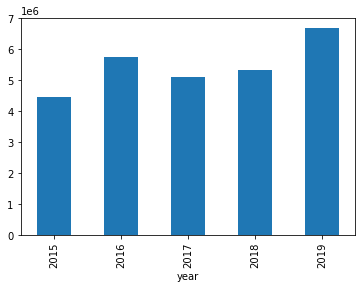

In [181]:
data[(data['locality_name'] == 'Санкт-Петербург') & (data['rooms'] == 2) & \
     (data['type'] == 'Другой') & (data['total_area'] == 50)].groupby('year')['last_price']\
.mean().plot(x='year', y='last_price', kind='bar');